# NOTE TO PROFESSOR
- Please note the process that went into building this code. 
- These graphs and ideas were first executed outside of Python, with tools like Excel and Desmos, and then translated into Python code via the help of Artificial Intelligence. The code was proofchecked and analysed as it was built out, and then was proofchecked a second time against the models built in other platforms. 
- The notes and analyses follow the graphs, so please scroll up from the notes and analyses to find the graphs the notes refer to. 
- Group Members:  Samuel Ginzburg, Sebastian De Wind Pesantes, Pedro Alejandro Medellin Esguerra, Maria do Carmo Vieira Da Fonseca de Brito E A, Ignacio Amigo Muñoz

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# OK, so first we need to load the data we've created. 
df = pd.read_csv('../data/final_merge.csv')
df.head()

,Unnamed: 0,country_name,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,cumulative_hospitalized_patients,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated
0,0,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,4.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,14.0,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,23.0,0.0,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Add the columns we'll be using for our analysis
df['new_deceased_over_new_confirmed'] = np.where((df['new_confirmed']!=0)|(df['new_confirmed'].notnull()),(df['new_deceased'] / df['new_confirmed']) * 100,0)
df['new_deceased_over_cumulative_confirmed'] = np.where((df['cumulative_confirmed']!=0)|(df['cumulative_confirmed'].notnull()),(df['new_deceased'] / df['cumulative_confirmed']) * 100,0)
df['cumulative_deceased_over_cumulative_confirmed'] = np.where((df['cumulative_confirmed']!=0)|(df['cumulative_confirmed'].notnull()),(df['cumulative_deceased'] / df['cumulative_confirmed']) * 100,0)
df['cumulative_deceased_over_population'] = np.where((df['population']!=0)|(df['population'].notna()),(df['cumulative_deceased'] / df['population']) * 100,0)
df.head()

,Unnamed: 0,country_name,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,...,new_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,cumulative_hospitalized_patients,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_deceased_over_new_confirmed,new_deceased_over_cumulative_confirmed,cumulative_deceased_over_cumulative_confirmed,cumulative_deceased_over_population
0,0,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,3,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,4,Germany,82786787,39130978,40156503,7220827,7398601,9303309,10024505,9955575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


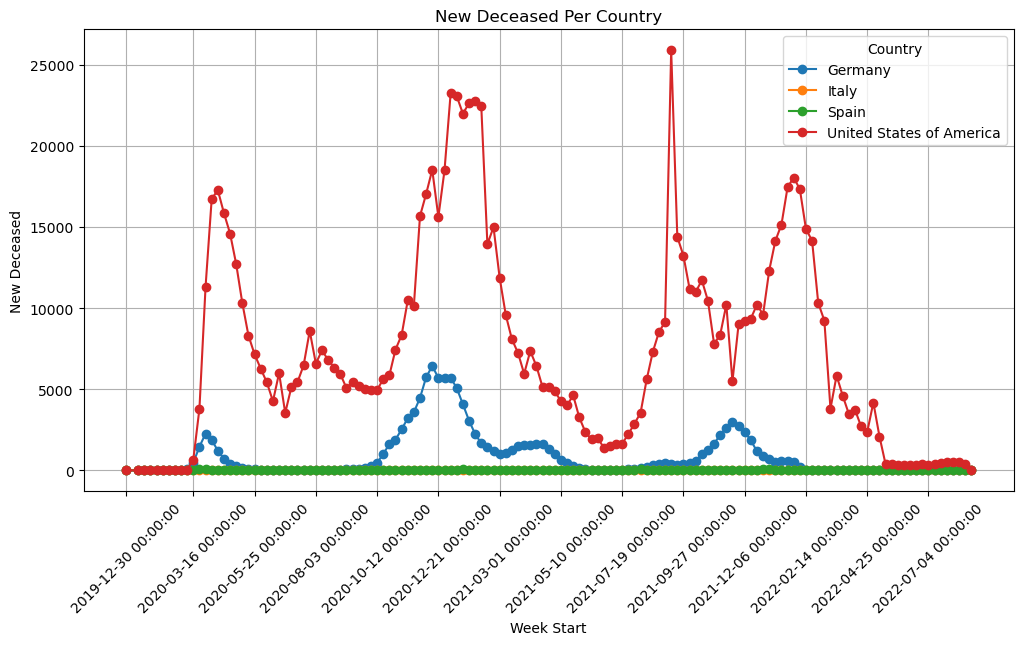

In [45]:
pivot1 = pd.pivot_table(df,values='new_deceased',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
pivot1.index = pd.to_datetime(pivot1.index)
plt.figure(figsize=(12, 6))
for country in pivot1.columns:
    plt.plot(pivot1.index,pivot1[country],marker='o',label=country)
plt.title('New Deceased Per Country')
plt.xlabel('Week Start')
plt.ylabel('New Deceased')
plt.xticks(ticks=pivot1.index[::10],labels=pivot1.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Notes and Analysis - Comparing Death Trends in Different Countries
- This line graph highlights trends in COVID deaths over a period of time. Please note that the countries provided data for different time periods - for that reason we see data for Germany cut off after Feb 14, 2022. We will further take into consideration these trends in future graphs and analyses. 
- One of the first, most blaring, insights is in the patterns between deaths in the USA and Germany. We see similar highs (early 2020, late fall 2020 to early spring 2021) and similar lows (summer 2020, summer 2021). With this, we also see divergent trends in 2021; where Germany follows the same patterns it saw in prior years (highs during the winter months, and lows in the summer), the USA sees peaks in the early fall and late winter, with an anomaly low in the early winter. 
- This divergence in patterns in 2022 is supported by the difference in variants spread through the countries. The US was hit by two variants, first by the Delta variant in early fall, and then by Omicron in the late winter. Both variants were relatively resistant to vaccinations, which at this point were widely available. 
- Another observation lies in the overall higher death values in the US versus those of Germany. This is rationalized via two external trends: One, the overall higher population in the US leads to higher number of deaths. Two, out of the wealthy countries, the US is one of the least healthy, and COVID is no exception - it had one of the highest percentages of deaths out of the population. 
- The final observation in these trends is the apparent lack of information in Spain and Italy. Italy presented absolutely no values for deaths, while Spain's reported deaths are too low in value to compare to those of the US and Germany. With that, we advance to the next graph that plots only Spanish deaths. We will tackle Italy in a further analysis. 


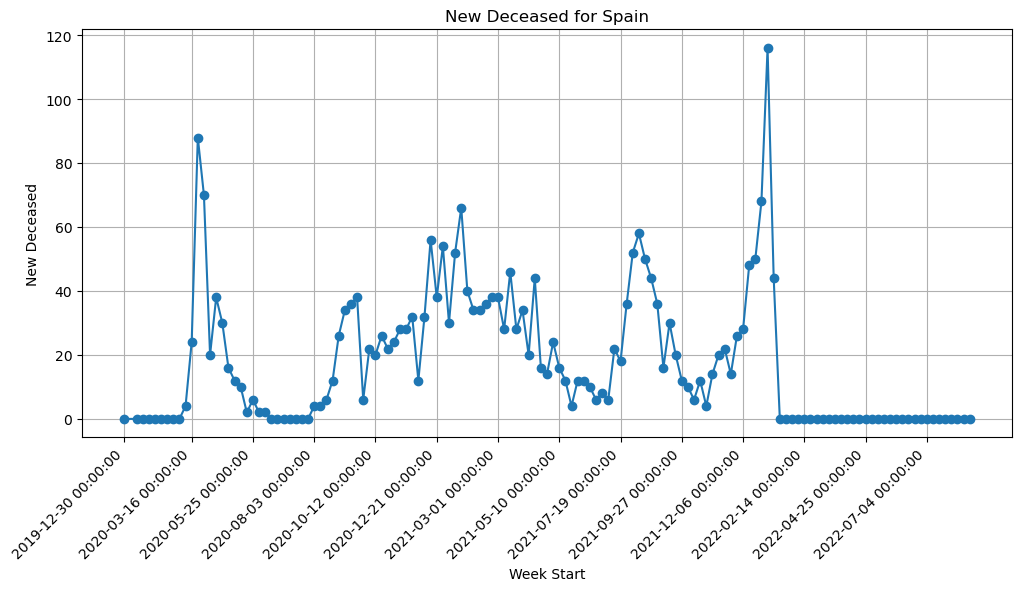

In [46]:
# Spain deserves its own graph because its available data is incomparable to that of the US and Germany
pivot1.index = pd.to_datetime(pivot1.index)
plt.figure(figsize=(12, 6))
pivot1['Spain'].plot(kind='line', marker='o') 
plt.title('New Deceased for Spain')
plt.xlabel('Week Start')
plt.ylabel('New Deceased')
plt.xticks(ticks=pivot1.index[::10],labels=pivot1.index[::10],rotation=45)
plt.grid(True)
plt.show()

# Notes and Analysis - Dear Spain, How Do You Expect Us to Trust You? 
- The first observation concerns the generally low values of deaths reported for Spain. This can be explained by relatively poor data quality. This hypothesis is supported by the number of 0s reported for weeks between 2020/06/15 and 2020/07/27. It is extremely unlikely that in the span of seven weeks, the country saw no deaths in the state of a pandemic. 
- With that being said, we decide not to question the data and proceed with the analysis. One of the arguments in support of our commitment to the data is the generally consistent trends between deaths in Spain, and deaths in Germany and the USA: We see highs in early 2020, then in late winter 2020-2021, and again in the fall and winter of 2021-2022 (especially similar to trends seen in the USA). 

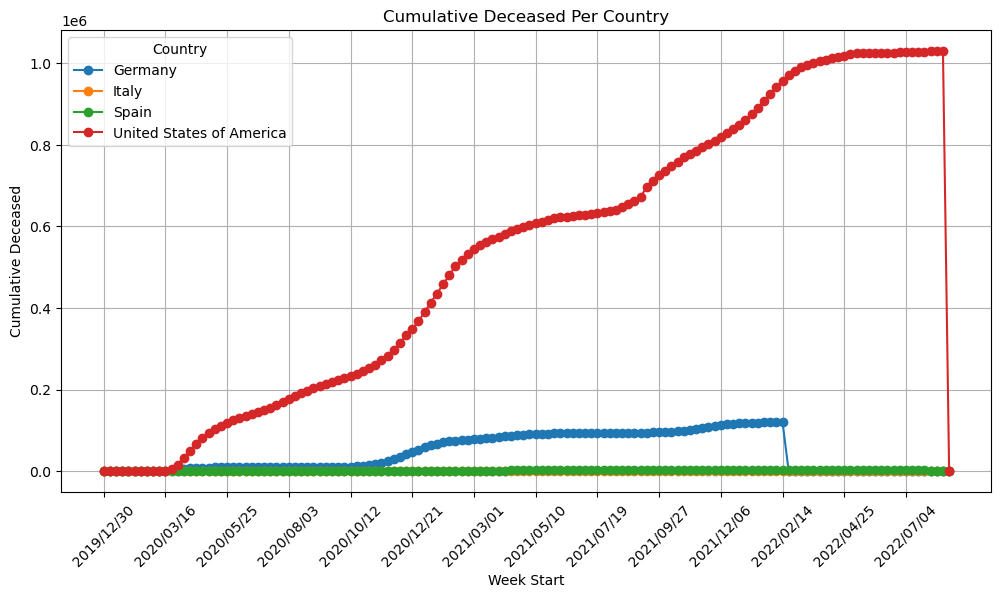

In [47]:
pivot2 = pd.pivot_table(df,values='cumulative_deceased',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 6))
for country in pivot2.columns:
    plt.plot(pivot2.index,pivot2[country],marker='o',label=country)
plt.title('Cumulative Deceased Per Country')
plt.xlabel('Week Start')
plt.ylabel('Cumulative Deceased')
plt.xticks(ticks=pivot2.index[::10],labels=pivot2.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

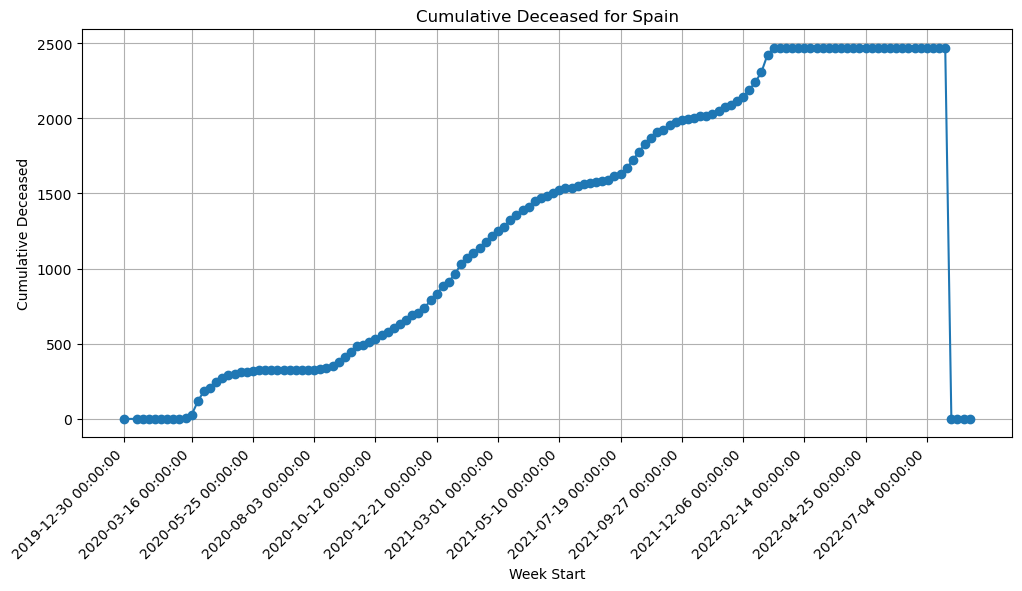

In [48]:
# Same action - create new graph for Spain
pivot2.index = pd.to_datetime(pivot2.index)
plt.figure(figsize=(12, 6))
pivot2['Spain'].plot(kind='line', marker='o') 
plt.title('Cumulative Deceased for Spain')
plt.xlabel('Week Start')
plt.ylabel('Cumulative Deceased')
plt.xticks(ticks=pivot2.index[::10],labels=pivot2.index[::10],rotation=45)
plt.grid(True)
plt.show()

# Notes and Analysis - Cumulative Deaths Increase, Duh!
- These graphs serve to show evident trends - the more people that pass, the higher the cumulative sum. 
- The only unique observations we can draw from this data is the different timespans of available information. We see Germany drop out after Feb 2022, while the US keeps reporting. 
    - With this in mind, we aim to draw comparisons between countries only for the time periods that they share in common. 
- Spain also shows a unique issue. It's cumulative sum stays consistent from Feb - Jul of 2022. This means that the country reported 0 deaths per week for almost five months before dropping out. This is obviously an issue with the data, supporting our hypothesis in the previous Spanish graph, that the data quality is problematic. In the future, we will avoid this timespan in our reporting/analysis. 

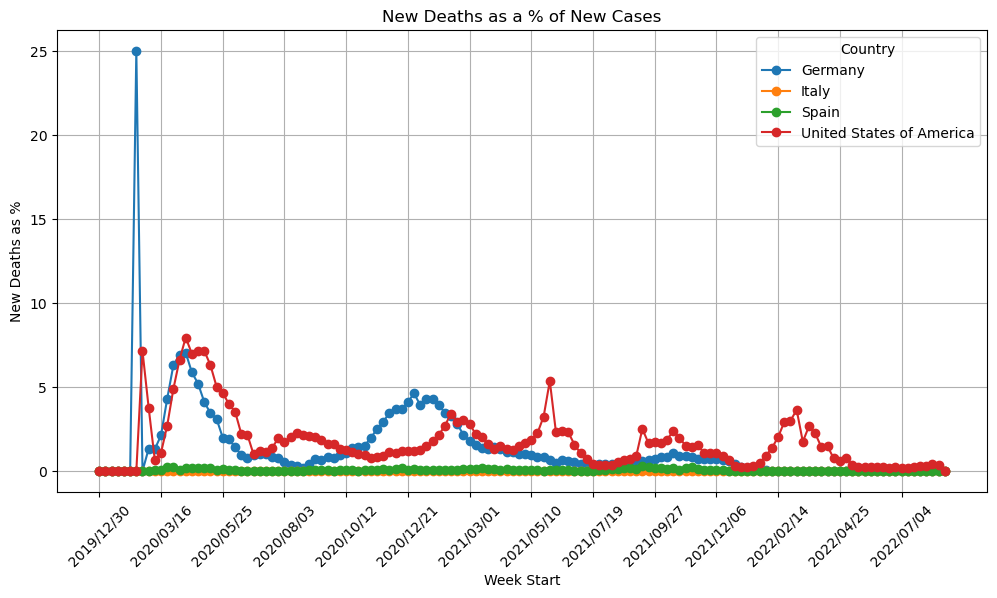

In [49]:
# New Deaths as a Percentage of New Cases (With initial weeks included)
pivot3 = pd.pivot_table(df,values='new_deceased_over_new_confirmed',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 6))
for country in pivot3.columns:
    plt.plot(pivot3.index,pivot3[country],marker='o',label=country)
plt.title('New Deaths as a % of New Cases')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
plt.xticks(ticks=pivot3.index[::10],labels=pivot3.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Notes and Analysis - We Didn't Have the Right Tools at the Beginning of the Pandemic
- The high spike in the beginning of the timespan speaks to the inaccuracy of recorded cases.
- This hypothesis is supported by our lack of accurate covid detection devices toward the beginning of the pandemic. 
- It makes sense for us to recreate this graph, removing those initial dates. 

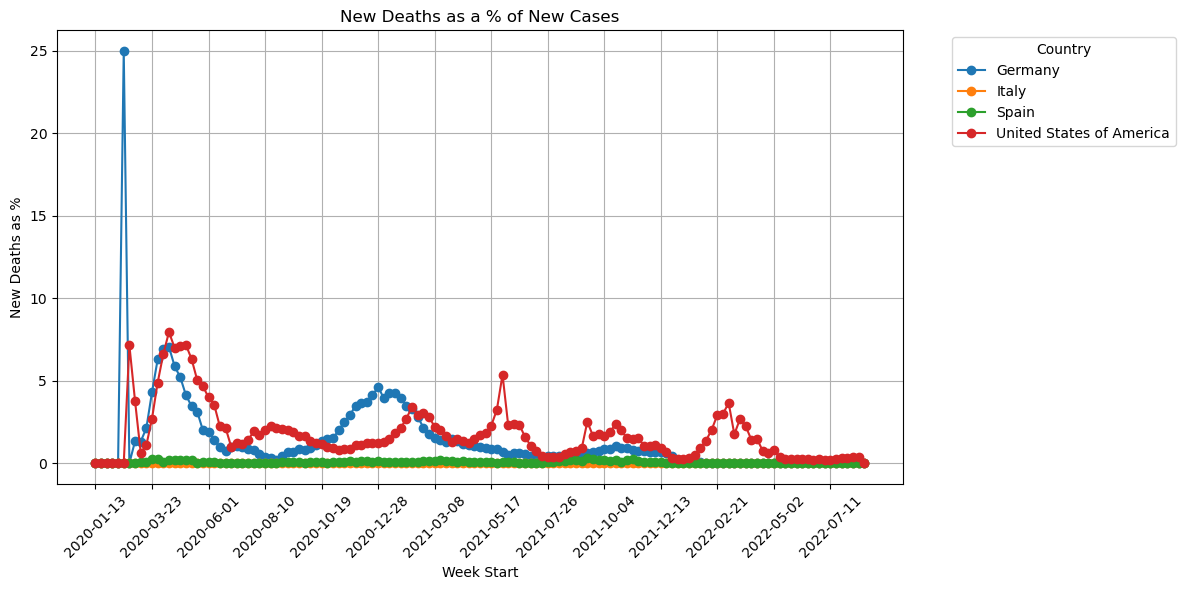

In [50]:
start_date = '2020-03-16'
filtered_pivot3 = pivot3[pivot3.index >= start_date]
filtered_pivot3.index = pd.to_datetime(filtered_pivot3.index)
plt.figure(figsize=(12, 6))
for country in filtered_pivot3.columns:
    plt.plot(filtered_pivot3.index, filtered_pivot3[country], marker='o', label=country)
plt.title('New Deaths as a % of New Cases')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
xticks = filtered_pivot3.index[::10]
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels([tick.strftime('%Y-%m-%d') for tick in xticks], rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Notes and Analysis - Dear USA, You're So Up and Down.
- Zooming in on New Deaths as a Percentage of New Cases echoes the insights drawn from the "New Deceased per Country" graphs from the beginning of the analysis: That trends between countries are relatively similar, with a few outlier points. 
- The USA reports higher volatility in these percentages.
- The USA also shows generally higher percentages than that of Germany, once again echoing relatively poorer health. 
- Finally, Spain reported consistently less than a percentage point (new deaths over new cases), speaking to improbable, and innaccurate reporting. 

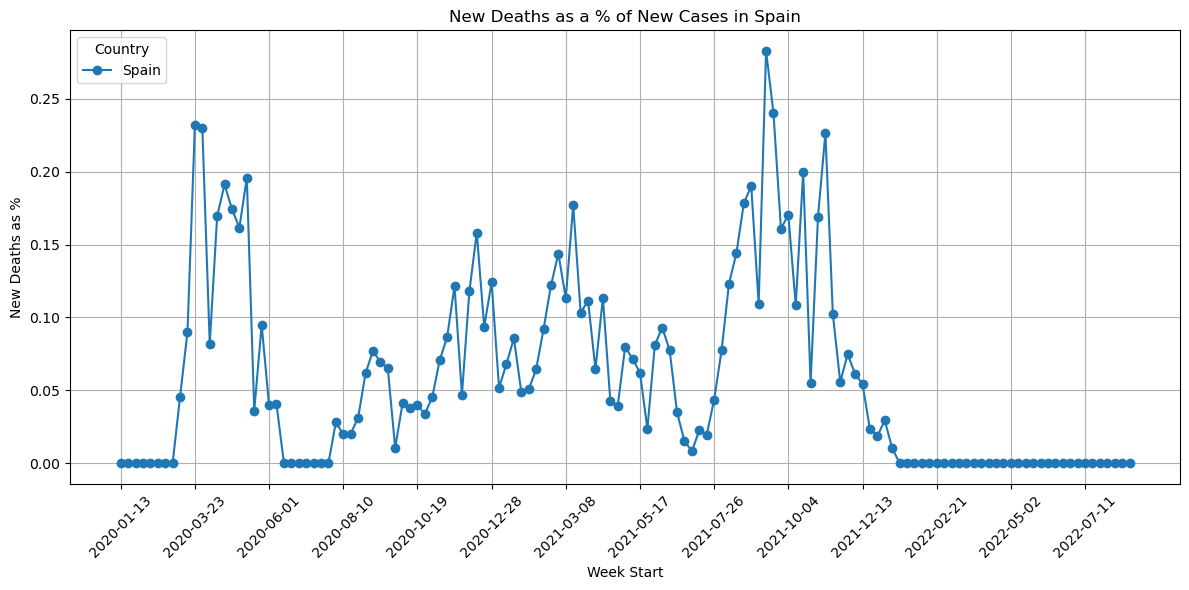

In [51]:
start_date = '2020-03-16'
filtered_pivot3 = pivot3[pivot3.index >= start_date]
filtered_pivot3.index = pd.to_datetime(filtered_pivot3.index)
spain_data = filtered_pivot3['Spain']
plt.figure(figsize=(12, 6))
plt.plot(spain_data.index, spain_data, marker='o', label='Spain')
plt.title('New Deaths as a % of New Cases in Spain')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
xticks = spain_data.index[::10]
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels([tick.strftime('%Y-%m-%d') for tick in xticks], rotation=45)
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

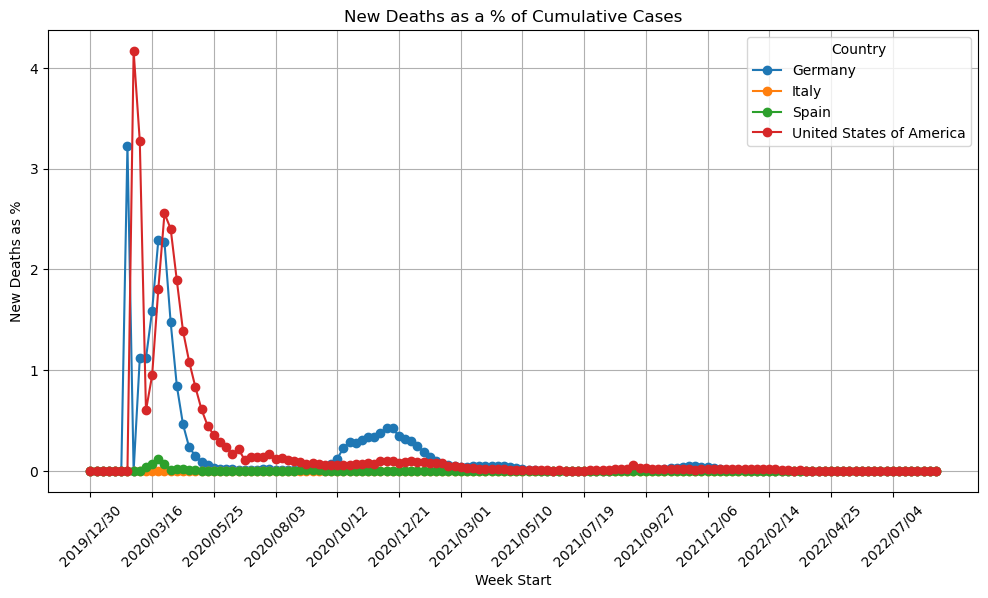

In [52]:
# New Deaths as a Percentage of Cumulative Cases (with initial weeks)
pivot4 = pd.pivot_table(df,values='new_deceased_over_cumulative_confirmed',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 6))
for country in pivot4.columns:
    plt.plot(pivot4.index,pivot4[country],marker='o',label=country)
plt.title('New Deaths as a % of Cumulative Cases')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
plt.xticks(ticks=pivot3.index[::10],labels=pivot3.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Notes and Analysis - COVID Tests Were Only Made Commerially Available in Late 2020
- Once again, a spike in the beginning of the pandemic speaks to a lack of efficient tools to track new cases - Germany had developed a relatively accurate and consumer-accessible COVID test only by mid-December 2020. Similarly, the US released its first consumer-accessible tests in Nov 2020. 
- For this reason, we eliminate these first couple of months to proceed. 

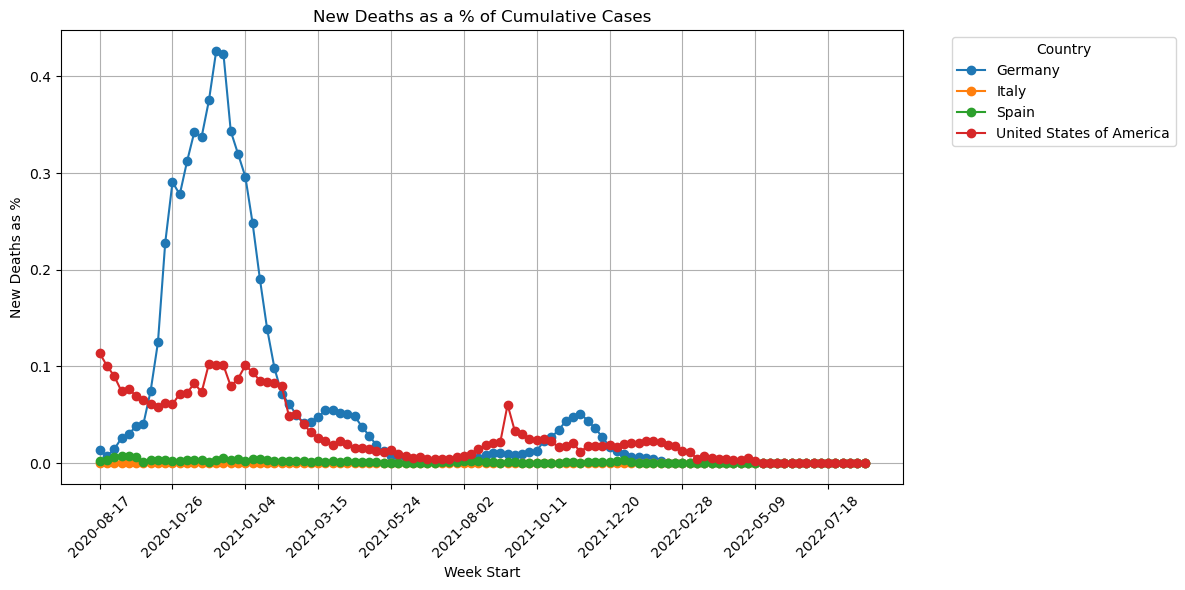

In [53]:
start_date = pd.to_datetime('2020-08-16')
pivot4.index = pd.to_datetime(pivot4.index)
filtered_pivot4 = pivot4[pivot4.index >= start_date]
plt.figure(figsize=(12, 6))
for country in filtered_pivot4.columns:
    plt.plot(filtered_pivot4.index, filtered_pivot4[country], marker='o', label=country)
plt.title('New Deaths as a % of Cumulative Cases')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
xticks = filtered_pivot4.index[::10]
xtick_labels = [tick.strftime('%Y-%m-%d') for tick in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Notes and Analysis - What's Going on With You, Germany? 
- The higher % of deaths in Germany in fall-winter of 2020 can be approached in one of two ways: 
    - We can echo Germany's lack of consumer-available testing until Dec 2020, which would point to the innaccuracy of information regarding cumulative testing. 
    - Or, if we trust the data reported by cumulative cases, we can use these trends to explain overall worse management of the crisis in Germany. Germany enacted a partial work shutdown only in Nov 2020, a relatively late response to a pandemic ravaging their population. A converse argument can be made - that the crisis was managed well, and cases were contained, while those affected were more likely to die. These hypotheses will be debunked in further graphs and analyses.  

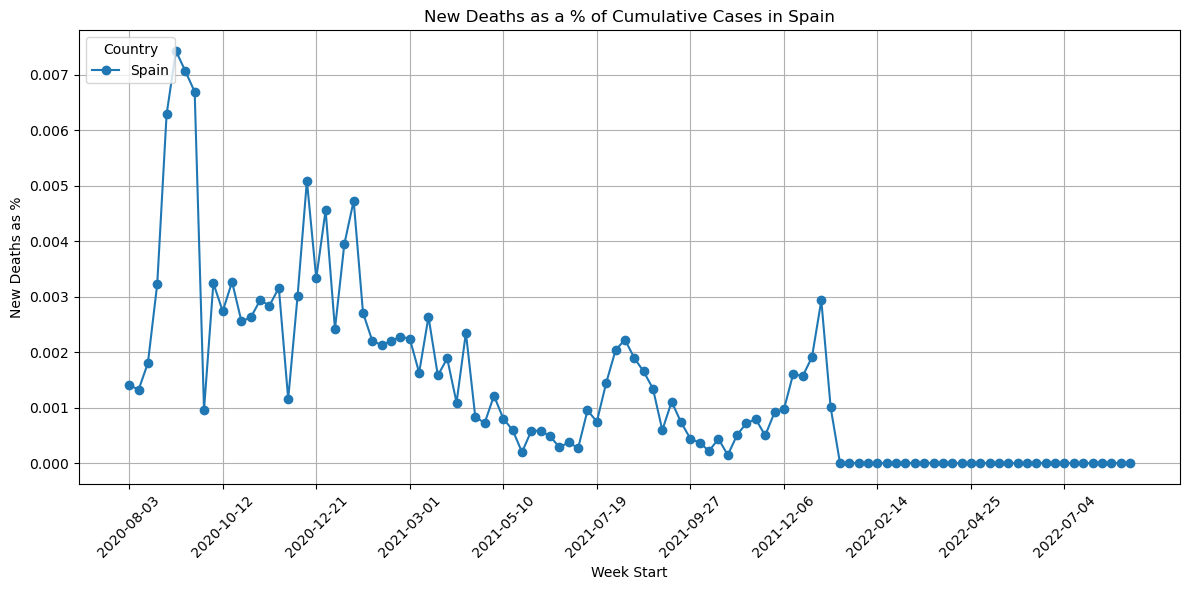

In [54]:
# New Deaths as a Percentage of Cumulative Cases (without initial weeks)
start_date = '2020-08-03'
filtered_pivot4 = pivot4[pivot4.index >= start_date]
filtered_pivot4.index = pd.to_datetime(filtered_pivot4.index)
spain_data = filtered_pivot4['Spain']
plt.figure(figsize=(12, 6))
plt.plot(spain_data.index, spain_data, marker='o', label='Spain')
plt.title('New Deaths as a % of Cumulative Cases in Spain')
plt.xlabel('Week Start')
plt.ylabel('New Deaths as %')
xticks = spain_data.index[::10]
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels([tick.strftime('%Y-%m-%d') for tick in xticks], rotation=45)
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

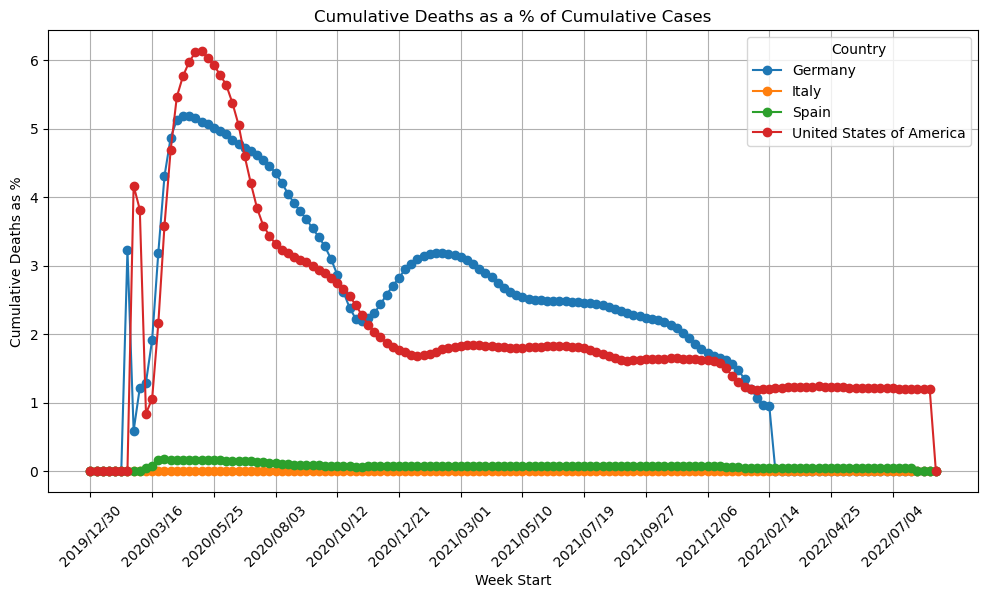

In [55]:
# Cumulative Deaths as % of Cumulative Cases
pivot5 = pd.pivot_table(df,values='cumulative_deceased_over_cumulative_confirmed',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 6))
for country in pivot5.columns:
    plt.plot(pivot5.index,pivot5[country],marker='o',label=country)
plt.title('Cumulative Deaths as a % of Cumulative Cases')
plt.xlabel('Week Start')
plt.ylabel('Cumulative Deaths as %')
plt.xticks(ticks=pivot5.index[::10],labels=pivot5.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Notes and Analysis - We're Getting Better at Controlling this Thing!
- The graph above shows an interesting trend - the consistent downtrend of cumulative deaths over cumulative cases. 
- Here we note developments in our ability to contain the crisis. Downtrends begin immediately after the first peak, after the virus is recognized globally as a pandemic.
- Another relative maximum is seen in both Germany and the USA in late 2020/early 2021 respectively. After this, trends move consistently downward, supporting the idea encompassing effective control of the virus via methods such as effective vaccination - Pfizer and Moderna reporting about 95% effectiveness by Nov 2020 - successful social practices, and enforcement of government and social policy. 

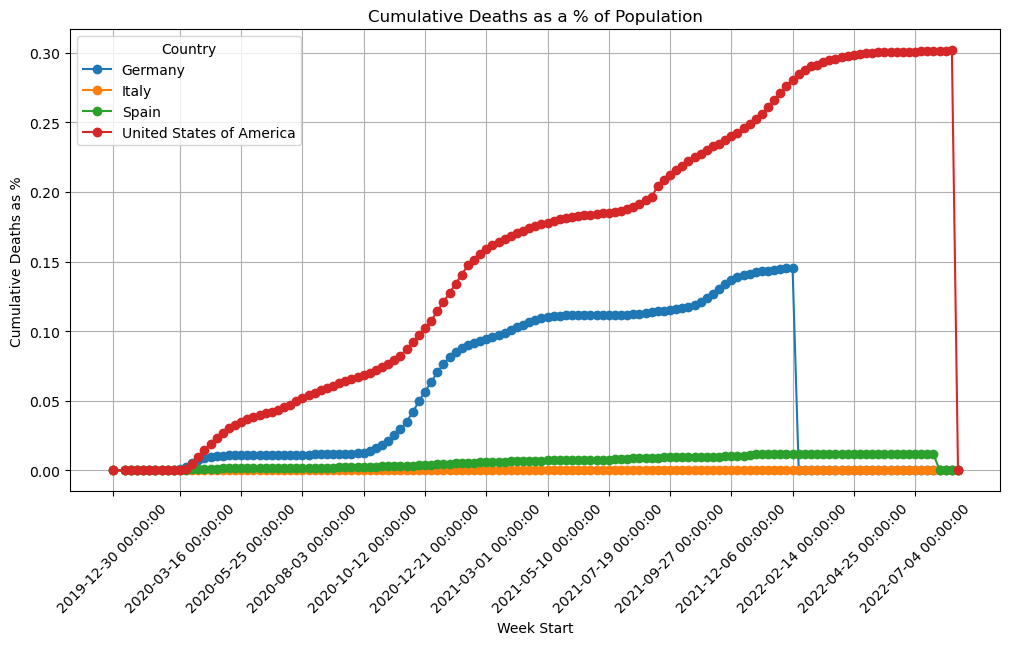

In [82]:
# Cumulative Deaths as a Percentage of the Population
pivot6 = pd.pivot_table(df,values='cumulative_deceased_over_population',index='week_start',columns='country_name',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 6))
for country in pivot6.columns:
    plt.plot(pivot6.index,pivot6[country],marker='o',label=country)
plt.title('Cumulative Deaths as a % of Population')
plt.xlabel('Week Start')
plt.ylabel('Cumulative Deaths as %')
plt.xticks(ticks=pivot6.index[::10],labels=pivot6.index[::10],rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Notes and Analysis - THIS GRAPH IS PROBLEMATIC
- PLEASE NOTE THAT THE POPULATION METRIC WAS INITIALLY INTRODUCED WITHOUT A TIMESTAMP, WHICH MEANS IT IS A STATIC VALUE, AND SHOULD NOT BE TREATED WITH TIME. THIS GRAPH PORTRAYS AN OBVIOUS TREND, THAT A HIGHER PERCENTAGE OF THE (STATIC) POPULATION DIES WITH EACH INDIVIDUAL CUMULATIVE DEATH
- We decide to include this graph to point out any possible inconsistencies/illogical trends in our data, however that theory is debunked, or proven wrong. 
- Please note, that if we had accurate information regarding population with respect to time, we may have seen different trends - For example, if the population grew at a faster pace than the population died with respect to covid, we may have actually seen a downward trend. 

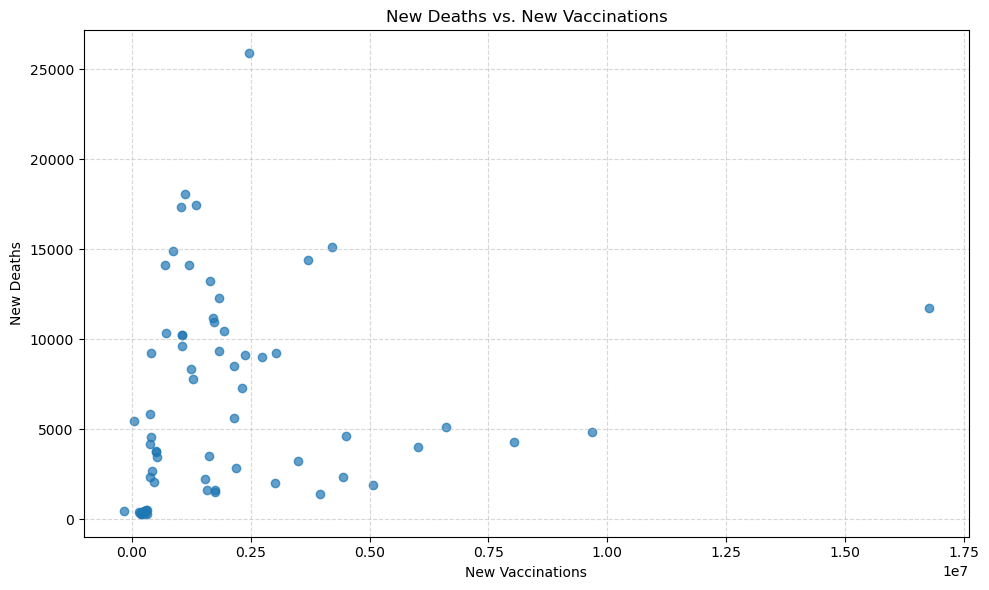

In [57]:
# New Deaths vs. New Vaccinations, Only for existing data, Only for USA
usa_data = df[(df['country_name'] == 'United States of America') & (~df['new_persons_fully_vaccinated'].isna())]
plt.figure(figsize=(10, 6))
plt.scatter(usa_data['new_persons_fully_vaccinated'], usa_data['new_deceased'], alpha=0.7)
plt.title('New Deaths vs. New Vaccinations')
plt.xlabel('New Vaccinations')
plt.ylabel('New Deaths')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Do Vaccines Have Anything to Do with COVID Deaths? 
- First, please note that information regarding vaccination is only available for the US, and so each of the following scatter plots regarding vaccinations are concerning ONLY the USA. 
- With this graph, we aim to identify any correlation between deaths and vaccinations. 
- This first graph points to an unlikely finding, that vaccinations and deaths show little correlation. 
- With this, we apply different transformations to this data in further graphs to try and explain this lack of correlation.

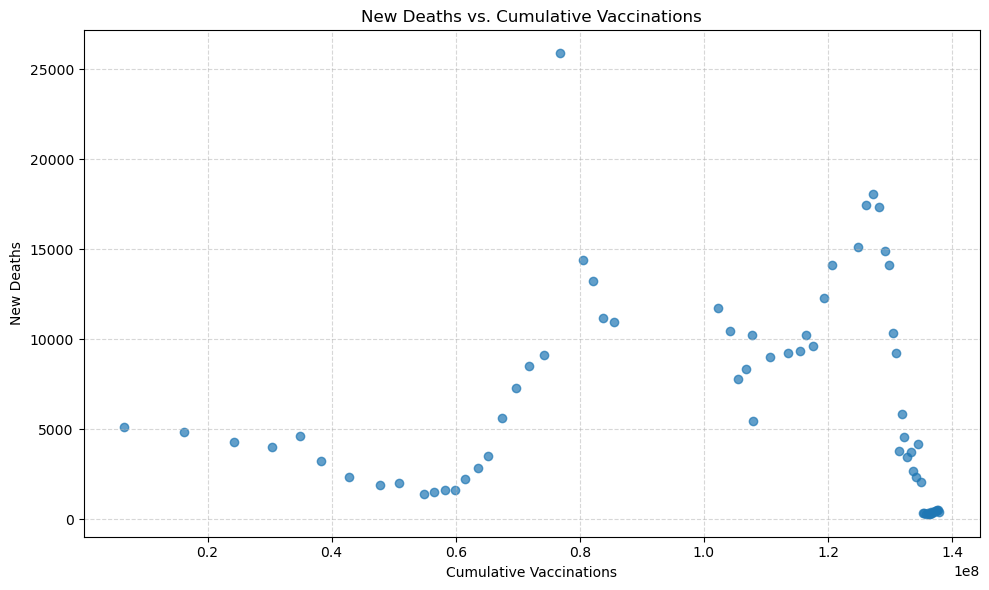

In [58]:
# New Deaths vs. Cumulative Vaccinations, Only for existing data, Only for USA
usa_data1 = df[(df['country_name'] == 'United States of America') & (~df['cumulative_persons_fully_vaccinated'].isna())]
plt.figure(figsize=(10, 6))
plt.scatter(usa_data1['cumulative_persons_fully_vaccinated'], usa_data1['new_deceased'], alpha=0.7)
plt.title('New Deaths vs. Cumulative Vaccinations')
plt.xlabel('Cumulative Vaccinations')
plt.ylabel('New Deaths')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Dear Vaccines, How About If We Look at You in the Long-Run? 
- Once again, the aim of this graph is to highlight any trends between vaccinations and new deaths,the difference being the x axis showing cumulative vaccinations.
- Logically, we expect the number of new deaths to decrease as more and more of the population is vaccinated. This hypothesis holds for the first set of data points, up until the number of cumulative vaccinations reaches 60,000,000. Then the trend shows some chaos, consistent with the chaos seen in the previous new deaths vs. new vaccinations graph. 
- We continue to explore this hypothesis in further graphs. 

/var/folders/91/rjyzry6x6nxbh21yy7l8hc800000gn/T/ipykernel_53709/1272997687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data2['week_start'] = pd.to_datetime(usa_data2['week_start'])


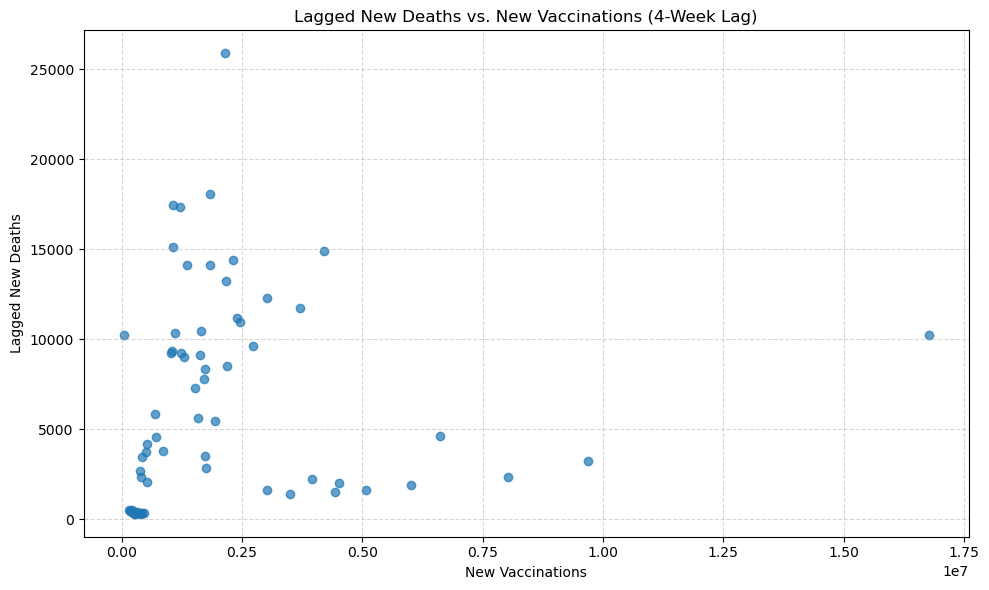

In [59]:
# New Deaths vs. New Vaccinations, Only for existing data, Only for USA (LAGGED BY FOUR WEEKS)
usa_data2 = df[(df['country_name'] == 'United States of America') & (~df['new_persons_fully_vaccinated'].isna())]
usa_data2['week_start'] = pd.to_datetime(usa_data2['week_start'])
usa_data2 = usa_data2.sort_values('week_start')
# LAG DEATHS BY 4 WEEKS
usa_data2['lagged_deaths'] = usa_data2['new_deceased'].shift(-4)
usa_data2 = usa_data2.dropna(subset=['lagged_deaths'])
plt.figure(figsize=(10, 6))
plt.scatter(usa_data2['new_persons_fully_vaccinated'], usa_data2['lagged_deaths'], alpha=0.7)
plt.title('Lagged New Deaths vs. New Vaccinations (4-Week Lag)')
plt.xlabel('New Vaccinations')
plt.ylabel('Lagged New Deaths')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Don't Vaccines Take Some Time to Work? 
- The first transformation we apply is a lag of four weeks between the vaccination and deaths data. That is to say, we ask ourselves: Is the correlation between vaccinations and deaths not present in previous graphs because it normally takes a number of weeks for the vaccination to take effect? 
- Once again, our hypothesis is proven wrong! There appears to be little correlation between the two variables. 
- HOWEVER, once we take a more granular look at the above graph, we see two different trendlines begin to emerge. It looks like there may be a trendline with a higher slope (that shows higher deaths with lower new vaccinations), and a trendline with a lower slope (that shows there may be generally less deaths with higher new vaccinations). We explore this possibility further by adding a third variable in our future graphs: time!
    - Please note we are not in any way saying that there is an inverse relationship between deaths and vaccinations. Regardless from which perspective we look at this graph, we see higher deaths with higher levels of new vaccinations - one trendline is just more drastic than the other. 

/var/folders/91/rjyzry6x6nxbh21yy7l8hc800000gn/T/ipykernel_53709/958289254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data4['week_start'] = pd.to_datetime(usa_data['week_start'])


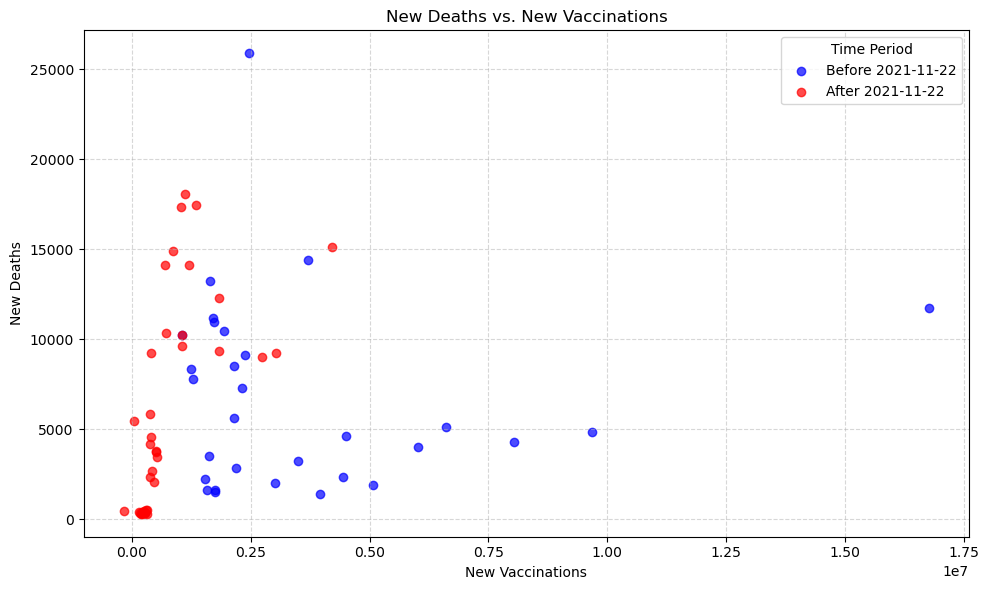

In [60]:
cutoff_date = '2021-11-22'
usa_data4 = df[(df['country_name'] == 'United States of America') & (~df['new_persons_fully_vaccinated'].isna())]
usa_data4['week_start'] = pd.to_datetime(usa_data['week_start'])
usa_data4 = usa_data4.sort_values('week_start')
usa_data4 = usa_data4.dropna(subset=['new_deceased'])
before_cutoff = usa_data4['week_start'] < cutoff_date
after_cutoff = usa_data4['week_start'] >= cutoff_date
plt.figure(figsize=(10, 6))
plt.scatter(
    usa_data4.loc[before_cutoff, 'new_persons_fully_vaccinated'],
    usa_data4.loc[before_cutoff, 'new_deceased'],
    color='blue',
    label=f'Before {cutoff_date}',
    alpha=0.7
)
plt.scatter(
    usa_data4.loc[after_cutoff, 'new_persons_fully_vaccinated'],
    usa_data4.loc[after_cutoff, 'new_deceased'],
    color='red',
    label=f'After {cutoff_date}',
    alpha=0.7
)
plt.title('New Deaths vs. New Vaccinations')
plt.xlabel('New Vaccinations')
plt.ylabel('New Deaths')
plt.legend(title='Time Period')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/91/rjyzry6x6nxbh21yy7l8hc800000gn/T/ipykernel_53709/2278528982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data3['week_start'] = pd.to_datetime(usa_data3['week_start'])


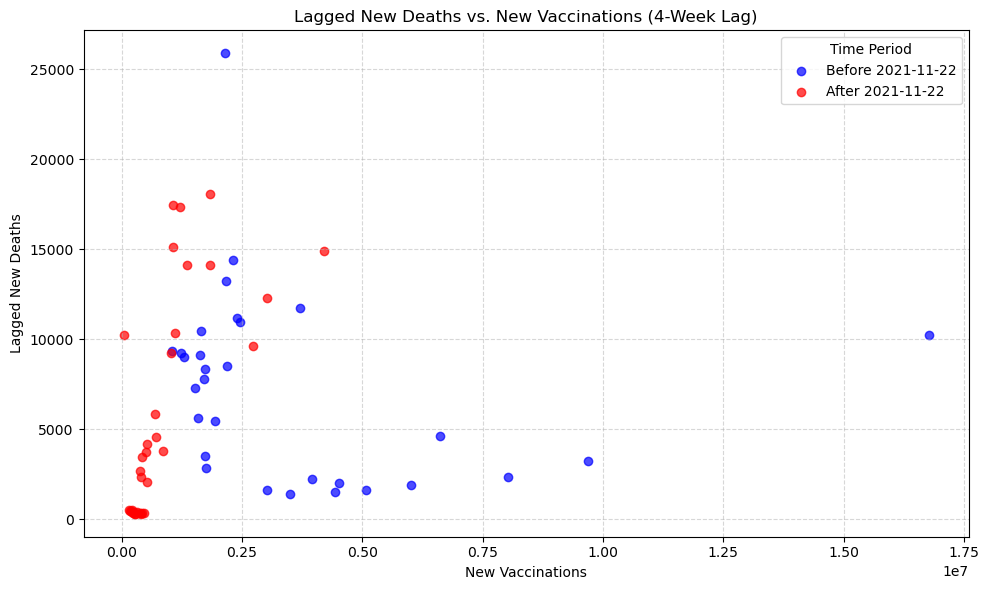

In [61]:
cutoff_date = '2021-11-22'
usa_data3 = df[(df['country_name'] == 'United States of America') & (~df['new_persons_fully_vaccinated'].isna())]
usa_data3['week_start'] = pd.to_datetime(usa_data3['week_start'])
usa_data3 = usa_data3.sort_values('week_start')
usa_data3['lagged_deaths'] = usa_data3['new_deceased'].shift(-4)
usa_data3 = usa_data3.dropna(subset=['lagged_deaths'])
before_cutoff = usa_data3['week_start'] < cutoff_date
after_cutoff = usa_data3['week_start'] >= cutoff_date
plt.figure(figsize=(10, 6))
plt.scatter(
    usa_data3.loc[before_cutoff, 'new_persons_fully_vaccinated'],
    usa_data3.loc[before_cutoff, 'lagged_deaths'],
    color='blue',
    label=f'Before {cutoff_date}',
    alpha=0.7
)
plt.scatter(
    usa_data3.loc[after_cutoff, 'new_persons_fully_vaccinated'],
    usa_data3.loc[after_cutoff, 'lagged_deaths'],
    color='red',
    label=f'After {cutoff_date}',
    alpha=0.7
)
plt.title('Lagged New Deaths vs. New Vaccinations (4-Week Lag)')
plt.xlabel('New Vaccinations')
plt.ylabel('Lagged New Deaths')
plt.legend(title='Time Period')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/91/rjyzry6x6nxbh21yy7l8hc800000gn/T/ipykernel_53709/41068609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data4['week_start'] = pd.to_datetime(usa_data4['week_start'])


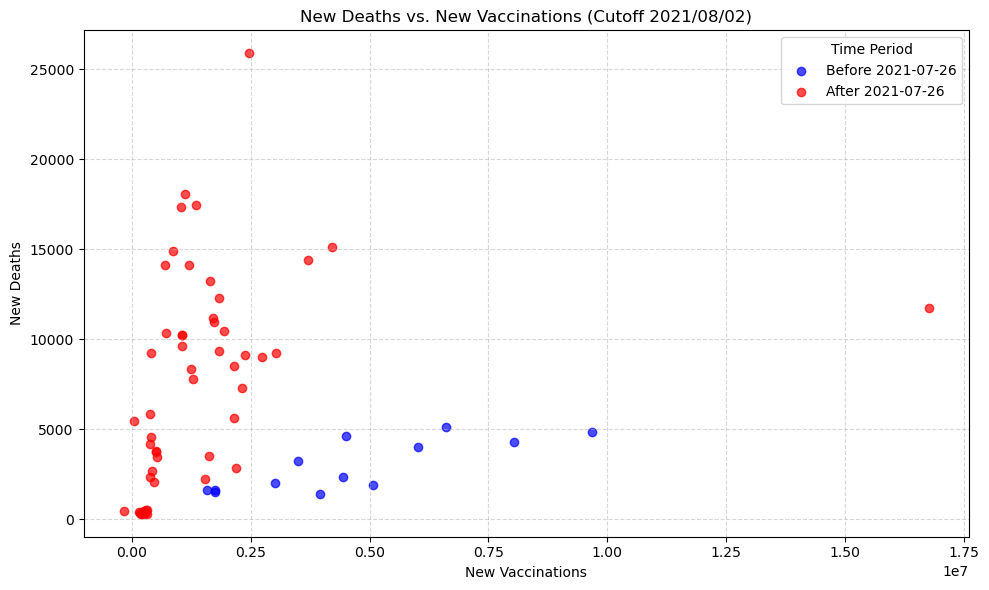

In [62]:
cutoff_date = '2021-07-26'
usa_data4 = df[(df['country_name'] == 'United States of America') & (~df['new_persons_fully_vaccinated'].isna())]
usa_data4['week_start'] = pd.to_datetime(usa_data4['week_start'])
usa_data4 = usa_data4.sort_values('week_start')
usa_data4 = usa_data4.dropna(subset=['new_deceased'])
before_cutoff = usa_data4['week_start'] < cutoff_date
after_cutoff = usa_data4['week_start'] >= cutoff_date
plt.figure(figsize=(10, 6))
plt.scatter(
    usa_data4.loc[before_cutoff, 'new_persons_fully_vaccinated'],
    usa_data4.loc[before_cutoff, 'new_deceased'],
    color='blue',
    label=f'Before {cutoff_date}',
    alpha=0.7
)
plt.scatter(
    usa_data4.loc[after_cutoff, 'new_persons_fully_vaccinated'],
    usa_data4.loc[after_cutoff, 'new_deceased'],
    color='red',
    label=f'After {cutoff_date}',
    alpha=0.7
)
plt.title('New Deaths vs. New Vaccinations (Cutoff 2021/08/02)')
plt.xlabel('New Vaccinations')
plt.ylabel('New Deaths')
plt.legend(title='Time Period')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - OK, We're Not Robert F. Kennedy, Jr! Vaccines Work. Why Does Our Data Show Otherwise? 
- The first two graphs above serve to explore our hypothesis that there may be two distinct trends in our correlation. Our initial approach was to split the dataset down the middle and highlight the data in different colors before and after that certain date (referring to the New Deaths vs. New Vaccinations graph).
- The graphs (New Deaths vs. New Vaccinations and New Deaths vs. New Vaccinations (4-Week Lag))effectively point to there being low correlation between deaths and new vaccinations before 2021/11/22, but then point to more consistent correlation between deaths and new vaccinations after 2021/11/22. 
    - The irony is in the relationship identified by these orange points - that the more new vaccinations, the more new deaths we report. The only way we can rationalize this finding is via the common "which came first, the chicken or the egg?" scenario. Here we can ask a parallel question: "do we have more new vaccinations because more people are dying, or more people dying because more people are vaccinated?" The latter is unlikely, and so we understand that because more people are dying, more people are incentivized to get vaccinated. 
- Another way we can interpret these graphs is by comparing them to the findings reported after the "new deaths vs. cumulative vaccinations" chart. Recall how we saw declining new deaths up to when the cumulative vaccinations reached 60,000,000, after which the new deaths experienced two large spikes, regardless of the increasing cumulative vaccinations. To explore this from another perspective, we split the dataset up before and after the cumulative vaccinations reached 60,000,000, which happened the week of 2021/07/26, portrayed in the final scatter plot. 
    - Now if we compare the blue to orange, we see that initially, smaller sums of people were dying with more new vaccinations (please note WE ARE NOT SAYING THAT THERE IS AN INVERSE RELATIONSHIP). Rather, there are two different trend lines, both relatively high correlation, but drawing different conclusions. 
    - We believe it is NOT a coincidence that the Delta variant experienced a surge in the US on the same week that trends seemed to diverge, the week of 2021/07/06. We believe that the vaccine was beginning to prove effective, until it was met with virus variants that were immune to its protection. This also explains the two humps in the new deaths vs. cumulative vaccinations graph, as the delta and omicron variants (both resistant to the vaccine) entered the picture. 
- In conclusion, the vaccine was likely effective at first, slowing down increases in new deaths until approximately 2021/07/26. Then, variants were introduced that started ravaging the population, at which point deaths surged, regardless of whether or not we pushed for more vaccinations.

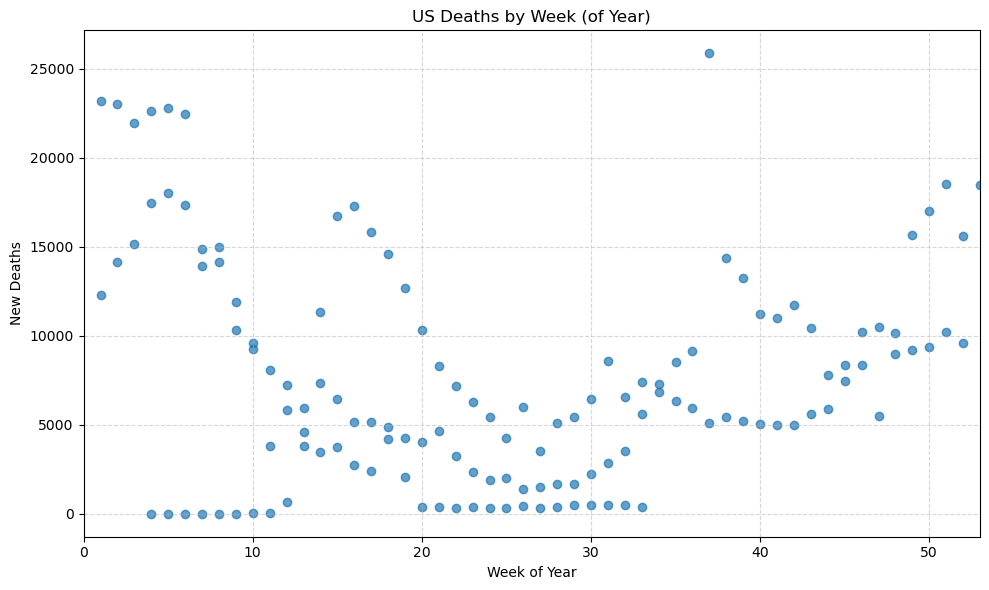

In [63]:
# US Deaths by Week of Year (To Show Seasonality)
df['week_start'] = pd.to_datetime(df['week_start'])
df['week_of_year'] = df['week_start'].dt.isocalendar().week
usa_data5 = df[df['country_name'] == 'United States of America']
plt.figure(figsize=(10, 6))
plt.scatter(usa_data5['week_of_year'], usa_data5['new_deceased'], alpha=0.7)
plt.title('US Deaths by Week (of Year)')
plt.xlabel('Week of Year')
plt.ylabel('New Deaths')
plt.xlim(0, 53)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

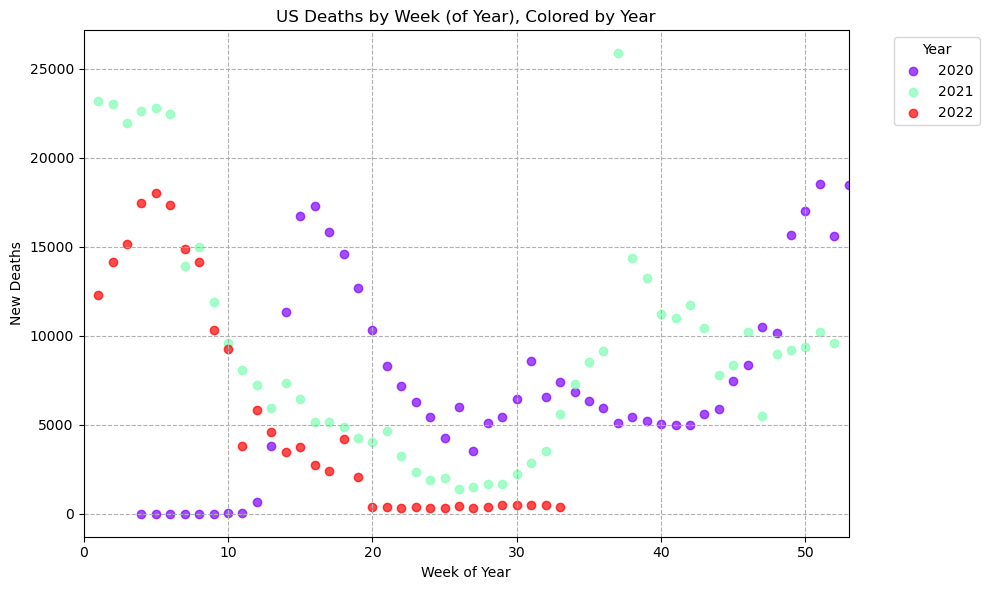

In [64]:
# Show US Deaths by week of year with years differentiated
import matplotlib.cm as cm
df['week_start'] = pd.to_datetime(df['week_start'])
df['week_of_year'] = df['week_start'].dt.isocalendar().week
df['year'] = df['week_start'].dt.year
usa_data6 = df[df['country_name'] == 'United States of America']
unique_years = sorted(usa_data6['year'].unique()) 
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = usa_data6[usa_data6['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        label=str(year), 
        color=colors[i], 
        alpha=0.7
    )
plt.title('US Deaths by Week (of Year), Colored by Year')
plt.xlabel('Week of Year')
plt.ylabel('New Deaths')
plt.xlim(0, 53)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# Notes and Analysis - Does COVID Follow Patterns as Old as the Common Cold? 
- The purpose of these two initial graphs is to show seasonal trends in deaths as the year advances. To do this, we took the new deaths and plotted it against the week_of_year, an artificial variable created to monitor time in relation to the year's advancement. 
- Here, we only look at USA deaths - we will apply this methodology to other countries later. 
- In both graphs, seasonality is obvious, pointing to a parabolic or sinusoidal shape, with lows during the summer months, and highs in late winter or fall. 
- The second graph takes this analysis a step further and colors the data points by year. Here it becomes obvious that 2020 took on a slightly different shape than that of 2021 and 2022; the initial peak takes place much later, around the 15th week of the year, as compared to the years that followed, which experienced peaks around the 5th week of the year. 
    - This is very easily rationalized when we take into consideration the late introduction of COVID to the USA. The virus only began to ravage the states in March of 2020, meaning that there couldn't have been a peak earlier than March. 
    - We further expand on this argument by removing the death values from 2020 in the following graphs. 

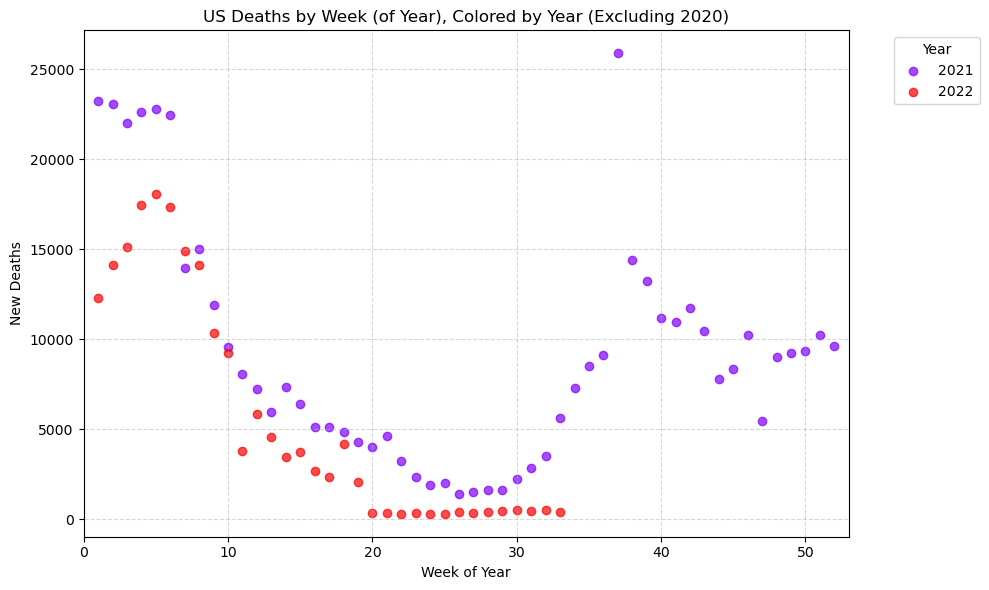

In [65]:
# Show US Deaths by week of year with years differentiated WITHOUT 2020 BECAUSE IT'S AN OUTLIER
df['week_start'] = pd.to_datetime(df['week_start'])
df['week_of_year'] = df['week_start'].dt.isocalendar().week
df['year'] = df['week_start'].dt.year
usa_data7 = df[(df['country_name'] == 'United States of America') & (df['year'] > 2020)]
unique_years = sorted(usa_data7['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = usa_data7[usa_data7['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        label=str(year), 
        color=colors[i], 
        alpha=0.7
    )
plt.title('US Deaths by Week (of Year), Colored by Year (Excluding 2020)')
plt.xlabel('Week of Year')
plt.ylabel('New Deaths')
plt.xlim(0, 53)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - With 2020 Out of the Picture, YES, a Pattern Emerges!
- Removing the data from 2020, we see a stronger pattern emerge. 
- We argue that although this leads to significantly less data for our next steps (finding a regression), we still have enough data to base our regression. On top of that, we argue that 2020 information is hazardous to our forecast, as it is furthest away from our desired time of forecast, and that the data exists in a different context (before the availability of vaccines, and standard medical procedures regarding COVID).
    - Considering these two points, we are lucky enough to be able to remove the 2020 deaths entirely, not a luxury we have with data from other countries (we explore this point further in analyses to come).

Fitted parameters for the sinusoidal regression:
a (amplitude): -15733952.393481804
b (frequency): 0.001521052503018265
c (phase shift): 1.5296241853382655
d (vertical shift): 15737728.542857528


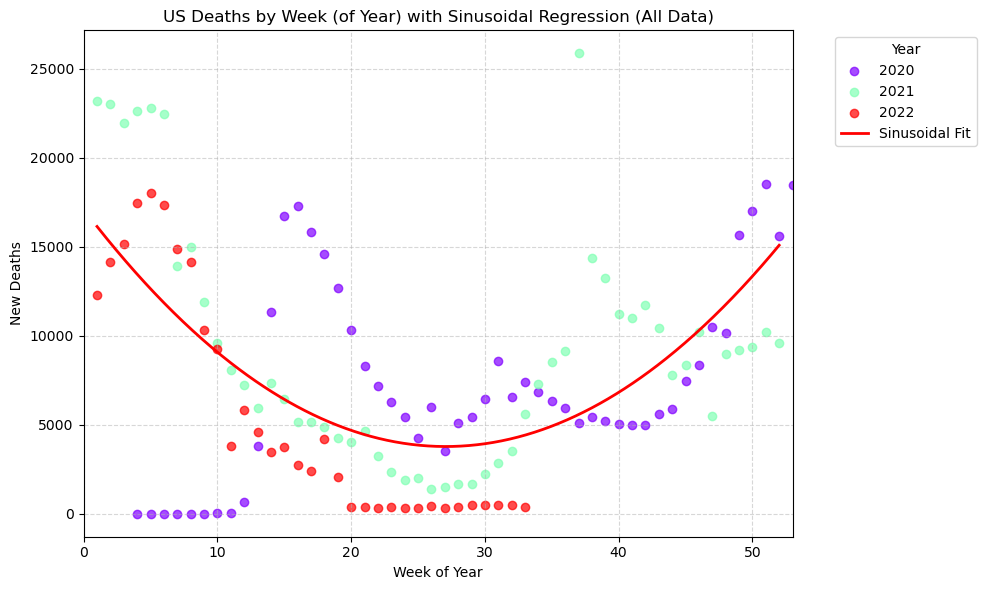

In [66]:
# USA Deaths (Total) with Sinusoidal Regression
from scipy.optimize import curve_fit

def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
df['week_of_year'] = df['week_start'].dt.isocalendar().week
df['year'] = df['week_start'].dt.year
usa_data9 = df[df['country_name'] == 'United States of America']
usa_data9 = usa_data9.dropna(subset=['week_of_year', 'new_deceased'])
usa_data9 = usa_data9[np.isfinite(usa_data9['new_deceased'])]
x_data = usa_data9['week_of_year']
y_data = usa_data9['new_deceased']
params, _ = curve_fit(sinusoidal, x_data, y_data, p0=[5000, 0.1, 0, 10000],maxfev=10000000)
x_fit = np.linspace(1, 52, 500)
y_fit = sinusoidal(x_fit, *params)
a, b, c, d = params
print(f"Fitted parameters for the sinusoidal regression:")
print(f"a (amplitude): {a}")
print(f"b (frequency): {b}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
plt.figure(figsize=(10, 6))
unique_years = sorted(usa_data9['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
for i, year in enumerate(unique_years):
    year_data = usa_data9[usa_data9['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        label=str(year), 
        color=colors[i], 
        alpha=0.7
    )
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('US Deaths by Week (of Year) with Sinusoidal Regression (All Data)')
plt.xlabel('Week of Year')
plt.ylabel('New Deaths')
plt.xlim(0, 53)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

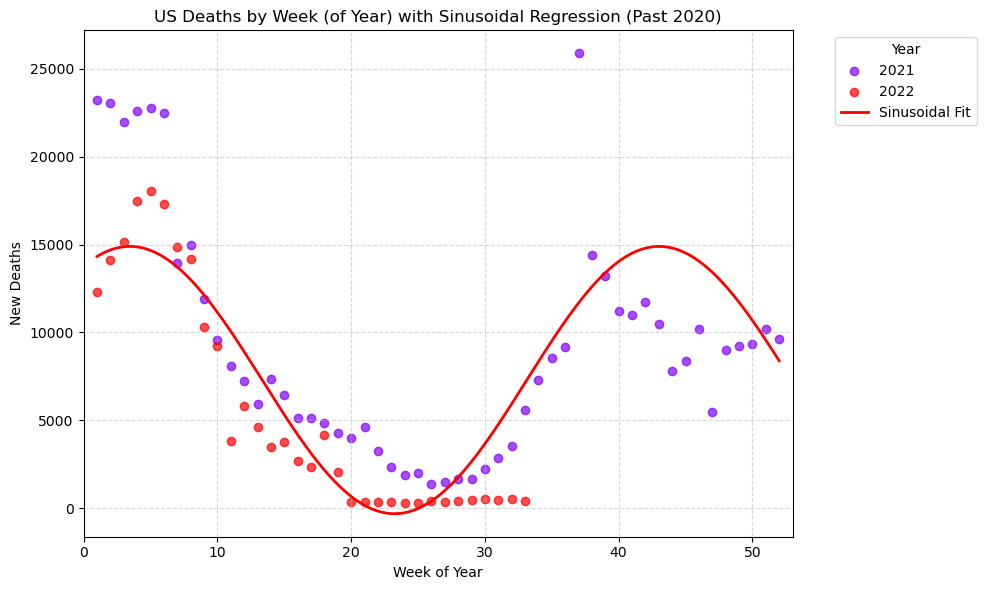

Fitted parameters for the sinusoidal regression:
a (amplitude): -7601.006899109519
b (frequency): -0.15880923923569534
c (phase shift): 5.261450005147248
d (vertical shift): 7291.491080829862


In [67]:
# USA Deaths (past 2020) with Sinusoidal Regression
from scipy.optimize import curve_fit

def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
df['week_of_year'] = df['week_start'].dt.isocalendar().week
df['year'] = df['week_start'].dt.year
usa_data8 = df[(df['country_name'] == 'United States of America') & (df['year'] > 2020)]
usa_data8 = usa_data8.dropna(subset=['week_of_year', 'new_deceased'])
usa_data8 = usa_data8[np.isfinite(usa_data8['new_deceased'])]
x_data = usa_data8['week_of_year']
y_data = usa_data8['new_deceased']
params, _ = curve_fit(sinusoidal, x_data, y_data, p0=[5000, 0.1, 0, 10000])
x_fit = np.linspace(1, 52, 500) 
y_fit = sinusoidal(x_fit, *params)
plt.figure(figsize=(10, 6))
unique_years = sorted(usa_data8['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
for i, year in enumerate(unique_years):
    year_data = usa_data8[usa_data8['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        label=str(year), 
        color=colors[i], 
        alpha=0.7
    )
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('US Deaths by Week (of Year) with Sinusoidal Regression (Past 2020)')
plt.xlabel('Week of Year')
plt.ylabel('New Deaths')
plt.xlim(0, 53)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
a, b, c, d = params
print(f"Fitted parameters for the sinusoidal regression:")
print(f"a (amplitude): {a}")
print(f"b (frequency): {b}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")

# Notes and Analysis - What Kind of Regression Should We Use? Why? 
- The previous two graphs begin to play with building a regression line over the different sets of data. We chose a sinusoidal regression to highlight seasonal trends. 
- Please note that in these phases, we had not yet defined a constant period for our sinusoidal regression, playing with whatever values the regression calculator had to offer us. 
- The first graph (US Deaths by Week (of Year) with Sinusoidal Regression (All Data)) ignores our previous advice to ignore data from 2020, just to test the waters and see if it's a smart choice. 
    - We see that the sinusoidal regression offered is too wide, and resembles a parabolic shape moreso than a sine curve. 
- The second graph (US Deaths by Week (of Year) with Sinusoidal Regression (Past 2020)) takes up our advice to ignore information from 2020, and builds a sinusoidal curve accordingly
    - Here we run into the opposite problem, where the period is shorter than that of a year, pointing to the fact that there may be more than one peak season in a year. 
- We decide that it is irrational to include approximately 0.5 or 1.5 full waves in a year, and so our conclusion is to proceed with a constant period of 52 weeks per sinusoidal curve, showing one peak season and one low season. This effectively shows seasonality within a span of one year. 

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): -4905.037557216496
c (phase shift): -1.1640779028959454
d (vertical shift): 7976.318425371956


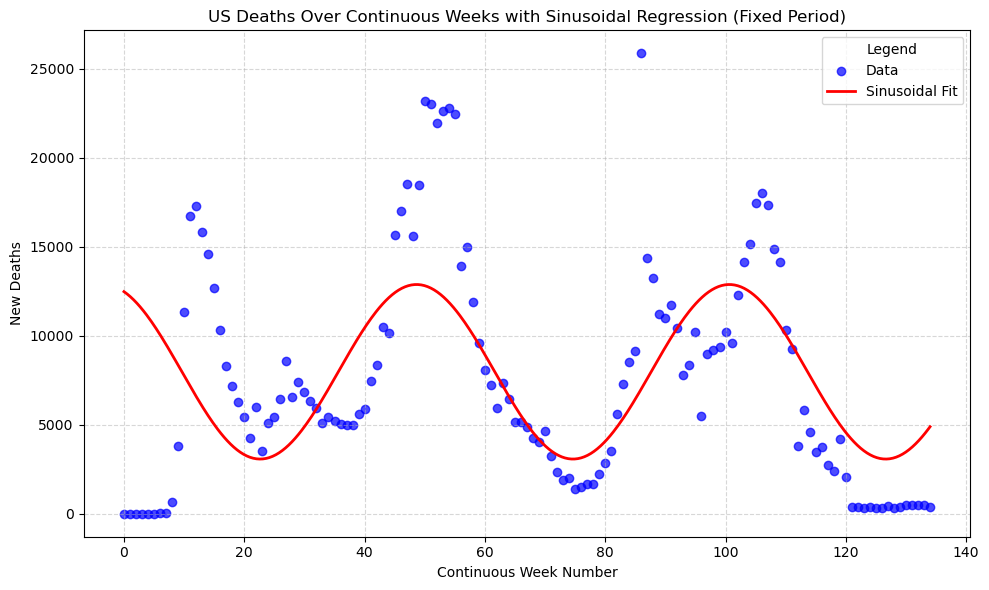

In [68]:
# Doesn't work, so we're going to make our period = 52 weeks

# Define the sinusoidal function with a fixed frequency (b = 2π / 52)
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
usa_data11 = df[df['country_name'] == 'United States of America']
usa_data11 = usa_data11.dropna(subset=['week_start', 'new_deceased'])
usa_data11 = usa_data11[np.isfinite(usa_data11['new_deceased'])]
usa_data11 = usa_data11.sort_values('week_start')
usa_data11['week_continuous'] = np.arange(len(usa_data11))
x_data = usa_data11['week_continuous']
y_data = usa_data11['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue', alpha=0.7)
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('US Deaths Over Continuous Weeks with Sinusoidal Regression (Fixed Period)')
plt.xlabel('Continuous Week Number')
plt.ylabel('New Deaths')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): -7435.011569589871
c (phase shift): -1.362681747688287
d (vertical shift): 8515.039059791785


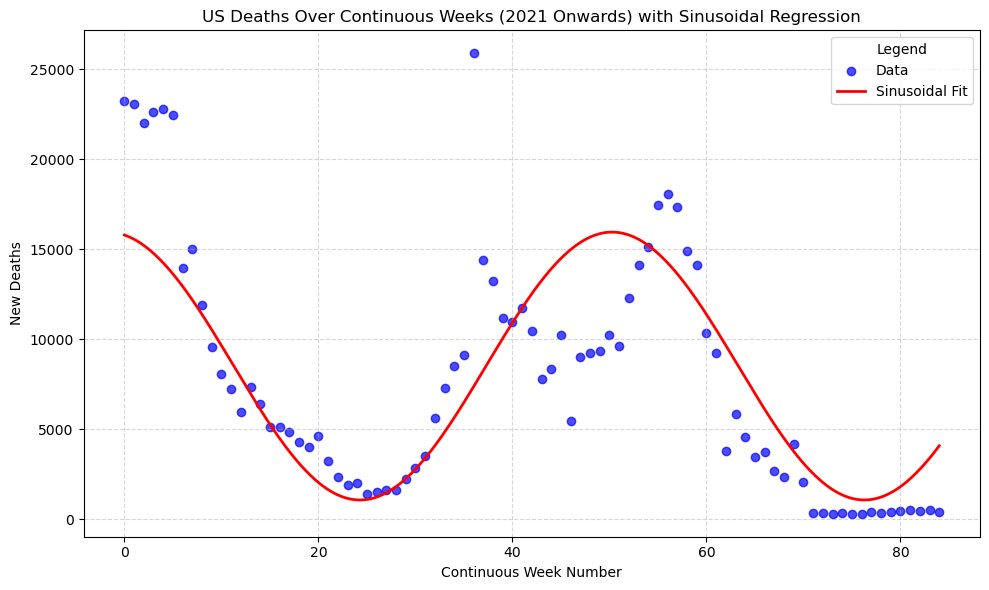

In [69]:
# Same thing but filtering for data post-2021

def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
usa_data_2021 = df[(df['country_name'] == 'United States of America') & (df['week_start'].dt.year >= 2021)]
usa_data_2021 = usa_data_2021.dropna(subset=['week_start', 'new_deceased'])
usa_data_2021 = usa_data_2021[np.isfinite(usa_data_2021['new_deceased'])]
usa_data_2021 = usa_data_2021.sort_values('week_start')
usa_data_2021['week_continuous'] = np.arange(len(usa_data_2021))
x_data = usa_data_2021['week_continuous']
y_data = usa_data_2021['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue', alpha=0.7)
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('US Deaths Over Continuous Weeks (2021 Onwards) with Sinusoidal Regression')
plt.xlabel('Continuous Week Number')
plt.ylabel('New Deaths')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Predictions for the next 52 weeks:
   week_start  predicted_new_deceased
0  2022-08-22             4840.953802
1  2022-08-29             5646.865001
2  2022-09-05             6494.600637
3  2022-09-12             7371.798814
4  2022-09-19             8265.668009
5  2022-09-26             9163.173595
6  2022-10-03            10051.227920
7  2022-10-10            10916.881152
8  2022-10-17            11747.510118
9  2022-10-24            12531.002377
10 2022-10-31            13255.932847
11 2022-11-07            13911.730411
12 2022-11-14            14488.832063
13 2022-11-21            14978.822361
14 2022-11-28            15374.556143
15 2022-12-05            15670.262719
16 2022-12-12            15861.630023
17 2022-12-19            15945.867487
18 2022-12-26            15921.746740
19 2023-01-02            15789.619517
20 2023-01-09            15551.412530
21 2023-01-16            15210.599372
22 2023-01-23            14772.149869
23 2023-01-30            14242.457600
24 2023-02-06  

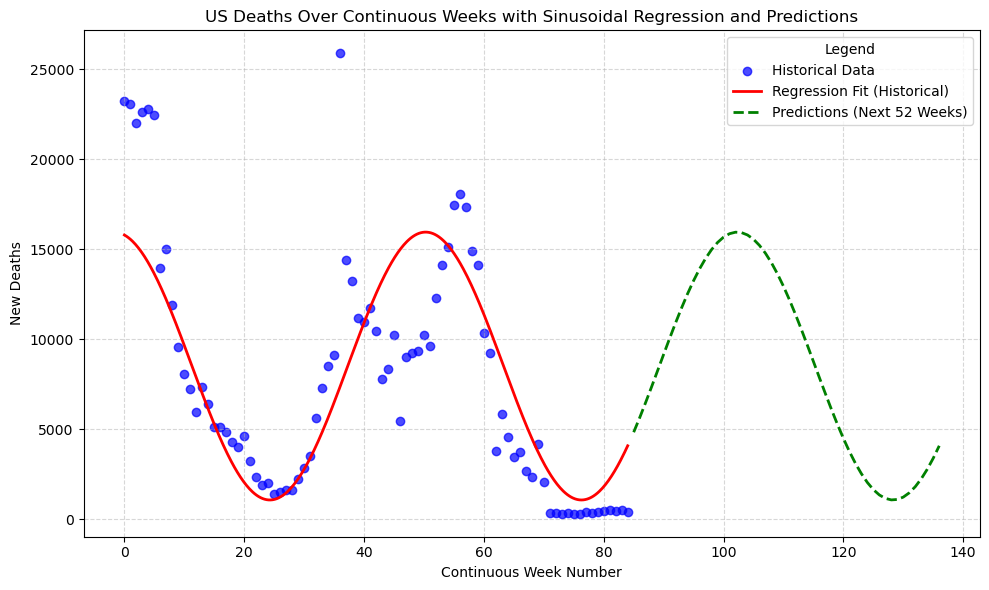

In [70]:
# FINALLY, MAKING PREDICTIONS !
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
usa_data_2021 = df[(df['country_name'] == 'United States of America') & (df['week_start'].dt.year >= 2021)]
usa_data_2021 = usa_data_2021.dropna(subset=['week_start', 'new_deceased'])
usa_data_2021 = usa_data_2021[np.isfinite(usa_data_2021['new_deceased'])]
usa_data_2021 = usa_data_2021.sort_values('week_start')
usa_data_2021['week_continuous'] = np.arange(len(usa_data_2021))
x_data = usa_data_2021['week_continuous']
y_data = usa_data_2021['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()] 
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
next_52_weeks = np.arange(x_data.max() + 1, x_data.max() + 53) 
next_52_predictions = sinusoidal_fixed_period(next_52_weeks, *params)
last_date = usa_data_2021['week_start'].max()
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, 53)]
predictions_df = pd.DataFrame({
    'week_start': future_dates,
    'predicted_new_deceased': next_52_predictions
})
print("Predictions for the next 52 weeks:")
print(predictions_df)
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Historical Data', color='blue', alpha=0.7)
plt.plot(x_fit, y_fit, color='red', label='Regression Fit (Historical)', linewidth=2)
plt.plot(next_52_weeks, next_52_predictions, color='green', linestyle='--', label='Predictions (Next 52 Weeks)', linewidth=2)
plt.title('US Deaths Over Continuous Weeks with Sinusoidal Regression and Predictions')
plt.xlabel('Continuous Week Number')
plt.ylabel('New Deaths')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Picking a Dataset and Making Death Forecasts for the USA
- The first two graphs ('US Deaths Over Continuous Weeks with Sinusoidal Regression (Fixed Period)' and 'US Deaths Over Continuous Weeks (2021 Onwards) with Sinusoidal Regression') expand on the notes we made in the previous week-of-year vs deaths graphs by removing the week-of-year variable and expanding the x axis into a running time curve. 
- Just to be safe, we once again analyze both datasets containing 2020 information and those ignoring it, building sinusoidal regressions with a predetermined period of 52 weeks over the available data. Apart from some outlier values, the residuals for the data containing only information from 2021 onwards are generally smaller, so we choose to go with that dataset. 
- Finally, we turn our attention to the 'US Deaths Over Continuous Weeks with Sinusoidal Regression and Predictions' graph to determine our forecast for the coming year. Using the sinusoidal regression built out in the previous graph, we plot the following 52 points. 
    - Seasonal trends are accounted for, our predictions seeing a relative maximum value of 15,945 deaths in mid-Dec 2022, and a relative minimum value of 1,084 deaths in mid-Jun 2023.
    - Although we reported very low death values for the final weeks of data in the USA, we do not soften the amplitude of our sinusoidal regression (via way of a polynomial sinusoidal curve or some other alternative), referring back to the low correlation between vaccinations and deaths. Although our tools at handling the crisis may have improved, and may lead to lower death values in the future, we have proved that the virus is resilient, and is capable of mutating into variants that can ravage the population. In other words, it's better we over-estimate and be better well-prepared, than we underestimate and let a future COVID variant to strike us by surprise. 

# LET'S DO THE SAME FOR GERMANY

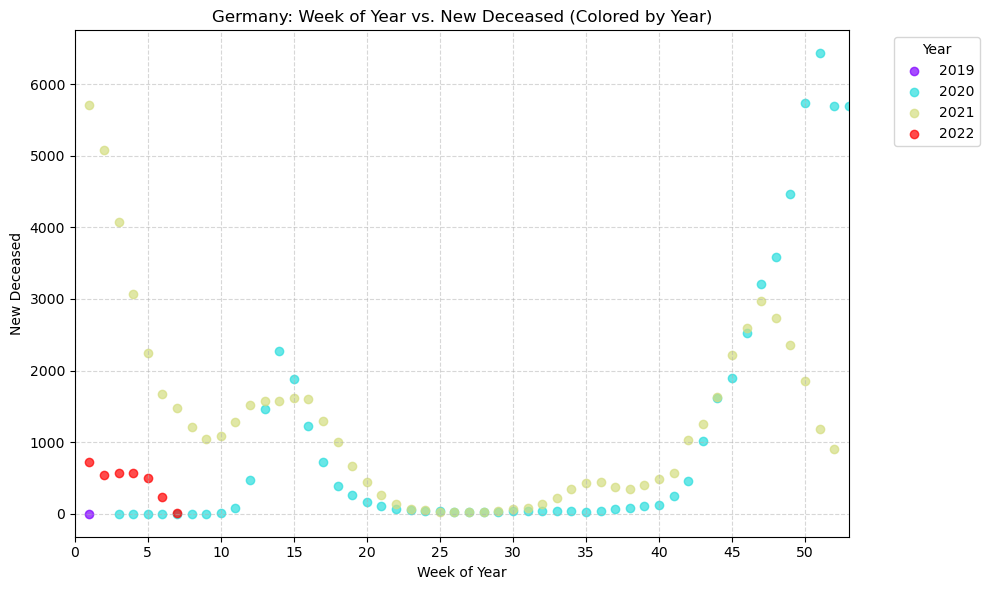

In [71]:
# Week of year Germany correlation
germany_data = df[df['country_name'] == 'Germany']
germany_data = germany_data.dropna(subset=['week_start', 'new_deceased'])
germany_data = germany_data[np.isfinite(germany_data['new_deceased'])]
germany_data['week_of_year'] = germany_data['week_start'].dt.isocalendar().week
germany_data['year'] = germany_data['week_start'].dt.year
unique_years = sorted(germany_data['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = germany_data[germany_data['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        color=colors[i], 
        label=str(year), 
        alpha=0.7
    )
plt.title('Germany: Week of Year vs. New Deceased (Colored by Year)')
plt.xlabel('Week of Year')
plt.ylabel('New Deceased')
plt.xlim(0, 53) 
plt.xticks(range(0, 54, 5))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - 2020 Data - To Keep or Not to Keep. 
- Exactly in the same way in which we plotted the new deaths as per week-of-year to show seasonality for the US, we set up this model for Germany. 
- Seasonality is evident by the peaks in winter and troughs in summer. 
- Here we come across the same 2020 issue we encountered in the USA. Because the virus was introduced to Europe closer to March, the trends for 2020 seem a little different from the trends in 2021, and so we ask ourselves the question: Do we keep the data or do we remove it? 
    - Unfortunately, if we were to hypothetically remove all data for 2020, we would be left with just a little over a year's worth of data, or only one full cycle (while in the US we have over 1.5 years of data remaining). With that in mind, we choose to keep the 2020 data in building our regression. 

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): 1174.9806625568535
c (phase shift): 1.5847725928122496
d (vertical shift): 1019.4967223777243


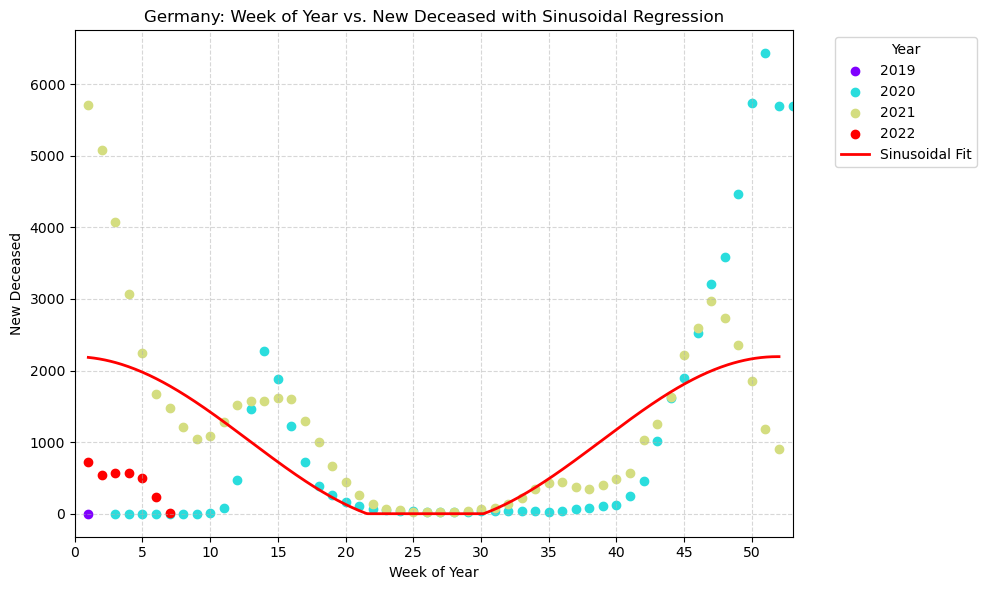

In [72]:
# Germany deaths with Sinusoidal regression (52 weeks fixed period)
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52  # Fixed frequency for 52 weeks
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
germany_data = df[df['country_name'] == 'Germany']
germany_data = germany_data.dropna(subset=['week_start', 'new_deceased'])
germany_data = germany_data[np.isfinite(germany_data['new_deceased'])]
germany_data['week_of_year'] = germany_data['week_start'].dt.isocalendar().week
germany_data['year'] = germany_data['week_start'].dt.year
x_data = germany_data['week_of_year']
y_data = germany_data['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(1, 52, 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
y_fit = np.maximum(y_fit, 0)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
unique_years = sorted(germany_data['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = germany_data[germany_data['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        color=colors[i], 
        label=str(year)
    )
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('Germany: Week of Year vs. New Deceased with Sinusoidal Regression')
plt.xlabel('Week of Year')
plt.ylabel('New Deceased')
plt.xlim(0, 53)
plt.xticks(range(0, 54, 5))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Predictions for the next 52 weeks:
   week_start  predicted_new_deceased
0  2022-02-21             1602.322160
1  2022-02-28             1475.603897
2  2022-03-07             1342.280247
3  2022-03-14             1204.295368
4  2022-03-21             1063.661391
5  2022-03-28              922.429075
6  2022-04-04              782.657907
7  2022-04-11              646.386064
8  2022-04-18              515.600697
9  2022-04-25              392.208951
10 2022-05-02              278.010155
11 2022-05-09              174.669585
12 2022-05-16               83.694179
13 2022-05-23                6.410564
14 2022-05-30                0.000000
15 2022-06-06                0.000000
16 2022-06-13                0.000000
17 2022-06-20                0.000000
18 2022-06-27                0.000000
19 2022-07-04                0.000000
20 2022-07-11                0.000000
21 2022-07-18                0.000000
22 2022-07-25               37.076575
23 2022-08-01              120.251159
24 2022-08-08  

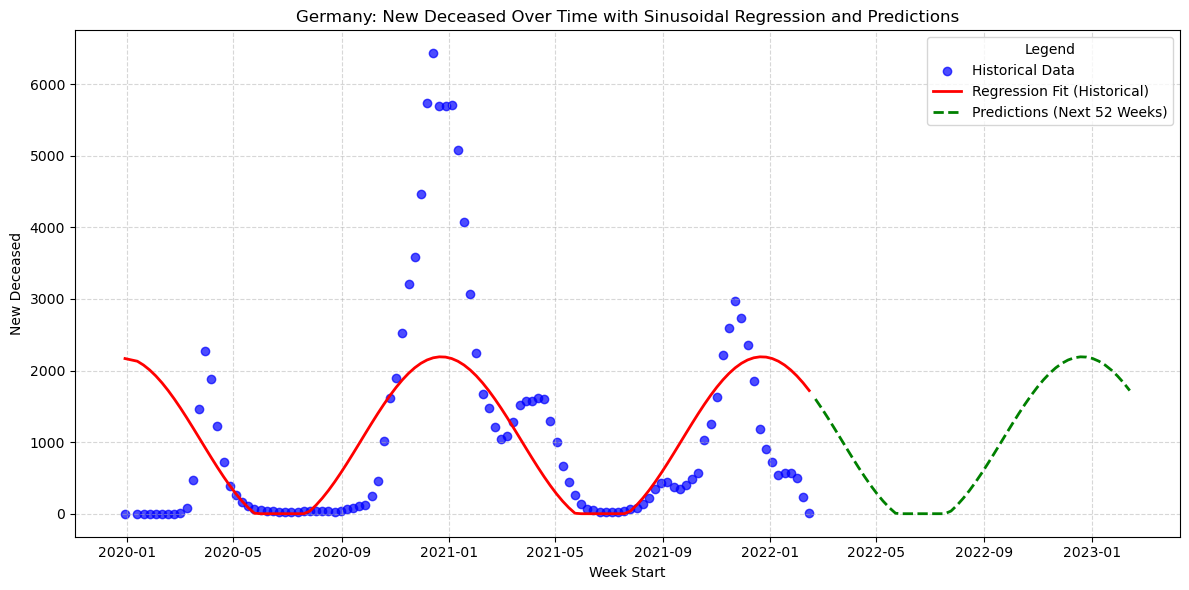

In [73]:
# GERMANY all deaths plotted, with sinusoidal curve, and forecasts for next year
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52 
    return a * np.sin(b * x + c) + d
df['week_start'] = pd.to_datetime(df['week_start'])
germany_data = df[df['country_name'] == 'Germany']
germany_data = germany_data.dropna(subset=['week_start', 'new_deceased'])
germany_data = germany_data[np.isfinite(germany_data['new_deceased'])]
germany_data = germany_data.sort_values('week_start')
germany_data['week_continuous'] = np.arange(len(germany_data))
x_data = germany_data['week_continuous']
y_data = germany_data['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
y_fit = np.maximum(y_fit, 0) 
next_52_weeks = np.arange(x_data.max() + 1, x_data.max() + 53)
next_52_predictions = sinusoidal_fixed_period(next_52_weeks, *params)
next_52_predictions = np.maximum(next_52_predictions, 0)
last_date = germany_data['week_start'].max()
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, 53)]
predictions_df = pd.DataFrame({
    'week_start': future_dates,
    'predicted_new_deceased': next_52_predictions
})
print("Predictions for the next 52 weeks:")
print(predictions_df)
plt.figure(figsize=(12, 6))
plt.scatter(germany_data['week_start'], germany_data['new_deceased'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(germany_data['week_start'], np.maximum(sinusoidal_fixed_period(x_data, *params), 0), color='red', label='Regression Fit (Historical)', linewidth=2)
plt.plot(future_dates, next_52_predictions, color='green', linestyle='--', label='Predictions (Next 52 Weeks)', linewidth=2)
plt.title('Germany: New Deceased Over Time with Sinusoidal Regression and Predictions')
plt.xlabel('Week Start')
plt.ylabel('New Deceased')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Germany Deaths Regression Model and Forecast
- First, please note that many of the graphs and points were cut out for the Germany analysis because so many of the points and realizations were the same - for example, the importance of using a fixed period of 52 weeks. 
- We look to the first graph, 'Germany: Week of Year vs. New Deceased with Sinusoidal Regression,' to see how accurately our sinusoidal regression captures our existing data. The lows line up pretty well, while the highs are more volatile and unpredictable. 
    - We run into a unique issue in the Germany analysis, where our forecasts for our lows run into negative territory. As it is impossible for us to report negative deaths, we alter our sinusoidal regression to have a minimum value of 0. 
- We remove the week-of-year variable and replace it with a running week analysis in the 'Germany: New Deceased Over Time with Sinusoidal Regression and Predictions' graph.
    - One of the more immediate, pleasant, surprises lies in how much better the sinusoidal regression lines up with the maximum values in 2022 than in 2021. Similar to the argument we made when analysing whether or not to keep 2020 information for our USA data, we should give greater weight to more recent data as opposed to earlier data. So even though our max actual deaths far exceed our max regression deaths in 2021, we are unphased, and trust that our data will resemble 2022 patterns more closely going forward. 
    - Our predictions for the following year report similar peak and trough times to those of the USA, with Germany forecasted to experience a peak of 2,191 deaths in mid-December 2022, and a low of 0 deaths in late May - early Jul of 2022. 

# LETS DO THE SAME FOR SPAIN

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): -12.40302869394423
c (phase shift): -1.3760456607353857
d (vertical shift): 20.41577695012213


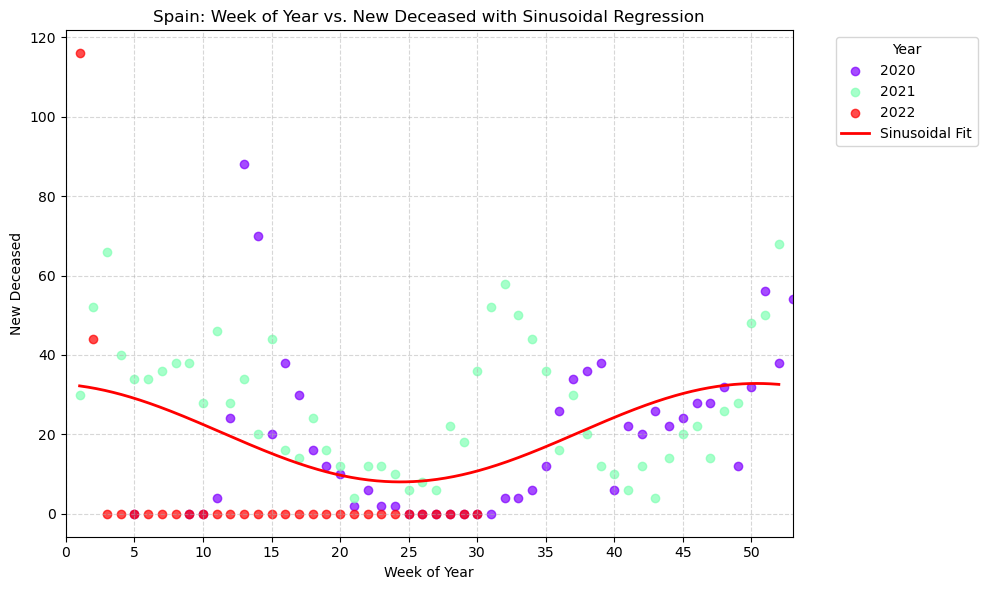

In [74]:
# Spain Week of Year vs. New Deceased
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52 
    return a * np.sin(b * x + c) + d
spain_data = df[df['country_name'] == 'Spain']
spain_data = spain_data.dropna(subset=['week_start', 'new_deceased'])
spain_data = spain_data[np.isfinite(spain_data['new_deceased'])]
spain_data['week_of_year'] = spain_data['week_start'].dt.isocalendar().week
spain_data['year'] = spain_data['week_start'].dt.year
x_data = spain_data['week_of_year']
y_data = spain_data['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(1, 52, 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
unique_years = sorted(spain_data['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = spain_data[spain_data['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        color=colors[i], 
        label=str(year), 
        alpha=0.7
    )
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('Spain: Week of Year vs. New Deceased with Sinusoidal Regression')
plt.xlabel('Week of Year')
plt.ylabel('New Deceased')
plt.xlim(0, 53)
plt.xticks(range(0, 54, 5))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - 2020/2022 Data - To Keep or Not to Keep?
- As we pointed out early on in our analysis (under the 'Cumulative Deceased for Spain; graph), reporting 0 deaths for plenty consecutive weeks in 2022 is very unlikely. Regardless of whether or not we have enough additional data, we choose to distrust this data and remove it. 
- The next question is a bit trickier: We faced the 2020 "inconsistency in seasonality" data issue for both Germany and the USA, and it's still relevant to Spain. But can we remove the 2020 data? The answer is in parallel with that of Germany. No, we do not have enough additional data to build an accurate regression. We must keep 2020.

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): 13.933114948212463
c (phase shift): 1.3098329130766804
d (vertical shift): 25.163375866522202


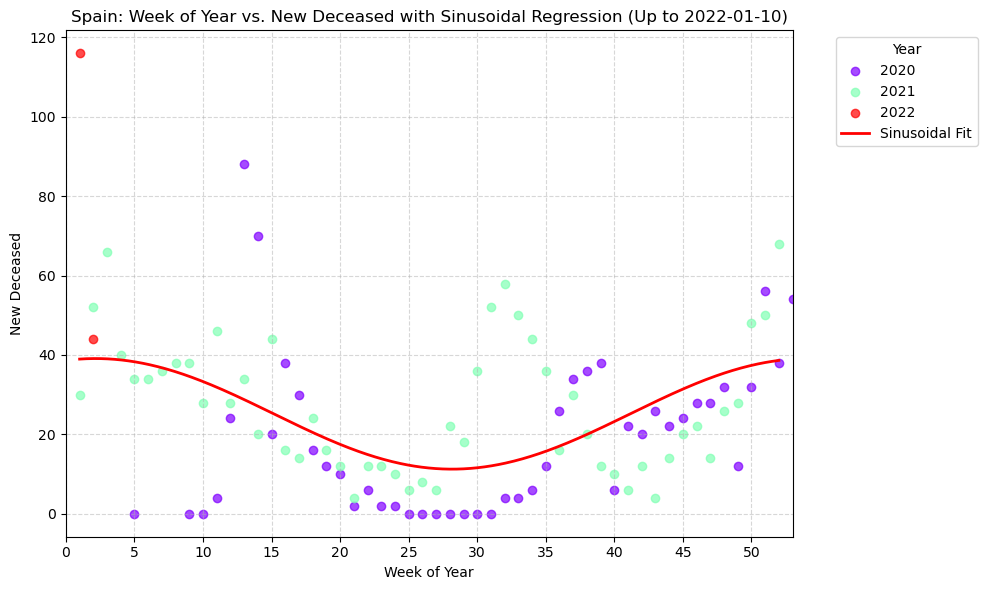

In [75]:
# Spain Week of Year vs. New Deceased (2022 Removed)
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52
    return a * np.sin(b * x + c) + d
end_date = pd.to_datetime('2022-01-10')
spain_data = df[(df['country_name'] == 'Spain') & (df['week_start'] <= end_date)]
spain_data = spain_data.dropna(subset=['week_start', 'new_deceased'])
spain_data = spain_data[np.isfinite(spain_data['new_deceased'])]
spain_data['week_of_year'] = spain_data['week_start'].dt.isocalendar().week
spain_data['year'] = spain_data['week_start'].dt.year
x_data = spain_data['week_of_year']
y_data = spain_data['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(1, 52, 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
unique_years = sorted(spain_data['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = spain_data[spain_data['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_deceased'], 
        color=colors[i], 
        label=str(year), 
        alpha=0.7
    )
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)
plt.title('Spain: Week of Year vs. New Deceased with Sinusoidal Regression (Up to 2022-01-10)')
plt.xlabel('Week of Year')
plt.ylabel('New Deceased')
plt.xlim(0, 53)
plt.xticks(range(0, 54, 5))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): -14.097544648876422
c (phase shift): -0.9049096715062218
d (vertical shift): 25.2021962766884
Predictions for the next 52 weeks:
   week_start  predicted_new_deceased
0  2022-01-17               39.065458
1  2022-01-24               38.655873
2  2022-01-31               38.050103
3  2022-02-07               37.256981
4  2022-02-14               36.288073
5  2022-02-21               35.157509
6  2022-02-28               33.881773
7  2022-03-07               32.479470
8  2022-03-14               30.971048
9  2022-03-21               29.378503
10 2022-03-28               27.725058
11 2022-04-04               26.034824
12 2022-04-11               24.332448
13 2022-04-18               22.642755
14 2022-04-25               20.990385
15 2022-05-02               19.399432
16 2022-05-09               17.893097
17 2022-05-16               16.493345
18 2022-05-23               15.220587
19 2022-05-30       

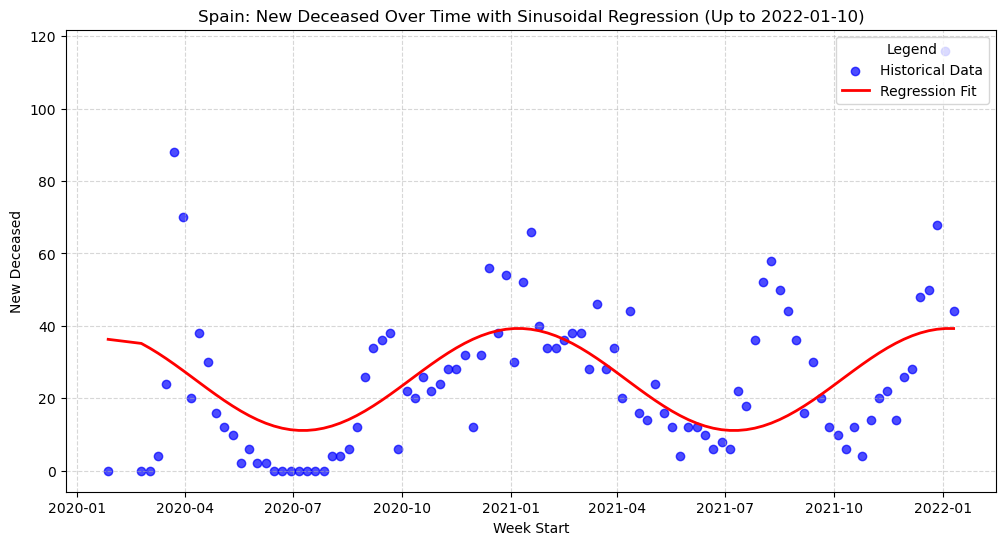

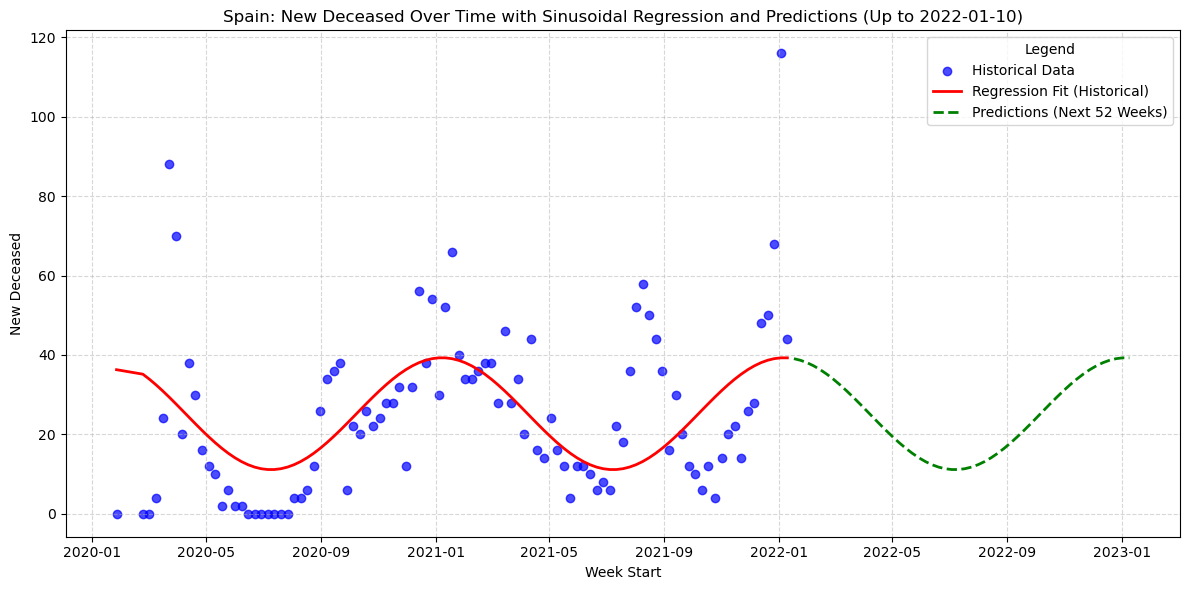

In [76]:
# New Deceased vs. Week Start continuous, with forecasts. 
spain_data = spain_data.sort_values('week_start')
spain_data['week_continuous'] = np.arange(len(spain_data))
x_data = spain_data['week_continuous']
y_data = spain_data['new_deceased']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
plt.figure(figsize=(12, 6))
plt.scatter(spain_data['week_start'], spain_data['new_deceased'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(spain_data['week_start'], sinusoidal_fixed_period(x_data, *params), color='red', label='Regression Fit', linewidth=2)
plt.title('Spain: New Deceased Over Time with Sinusoidal Regression (Up to 2022-01-10)')
plt.xlabel('Week Start')
plt.ylabel('New Deceased')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
next_52_weeks = np.arange(x_data.max() + 1, x_data.max() + 53)  # Continuous week numbers for prediction
next_52_predictions = sinusoidal_fixed_period(next_52_weeks, *params)
last_date = spain_data['week_start'].max()
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, 53)]
predictions_df = pd.DataFrame({
    'week_start': future_dates,
    'predicted_new_deceased': next_52_predictions
})
print("Predictions for the next 52 weeks:")
print(predictions_df)
plt.figure(figsize=(12, 6))
plt.scatter(spain_data['week_start'], spain_data['new_deceased'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(spain_data['week_start'], sinusoidal_fixed_period(x_data, *params), color='red', label='Regression Fit (Historical)', linewidth=2)
plt.plot(future_dates, next_52_predictions, color='green', linestyle='--', label='Predictions (Next 52 Weeks)', linewidth=2)
plt.title('Spain: New Deceased Over Time with Sinusoidal Regression and Predictions (Up to 2022-01-10)')
plt.xlabel('Week Start')
plt.ylabel('New Deceased')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Dear Spain, We Don't Like Your Dataset, but ok. Here's Your Regression Model and Forecast.
- These insights are extremely repetitive to those of both USA and Germany. However there are some unique observations for Spain, and they are as follows: 
- Note the volatility of data in all three graphs. 
    - Residuals seem larger, although this may be a product of just how small the death numbers reported are. The y axis on the Spain graph increases in intervals of 20, while that of Germany increases in intervals of 1,000, meaning that our eyes will be more sensitive to smaller changes in data on the Spanish graph.
    - Although there does seem to be a seasonal pattern, data from 2021 breaks away from this trend, with a peak in deaths in early fall. This runs counter to the argument we made in Germany, where we said we should give more weight to more recent data, and less weight to older figures, meaning our predictions should be less trusted. 
- Please recall the argument on seemingly poor data quality we made in the early parts of this report. Personally, we would stay away from drawing any conclusions from this data. But because we are committed to the dataset, we say Spain must have just had better luck with managing COVID cases and preventing deaths. For that reason, its deaths will be significantly smaller than its fellow country counterparts in the coming year. 
- Other patterns are consistent with the USA and Germany - lows in the summer of 2022 and highs in the winter of 2022. 

# ITALY - 
- The only data we have for Italy is the new cases (and cumulative cases), as well as the population. 
- We spoke about the issues associated with using a static metric like population spread across a period of time, so we'll center our predictions and analyses on new and cumulative cases, the only available temporal metrics for the country. 
- The first thing we're going to do is apply all the same reasoning we applied to the deaths, but to the cases, to predict the next 52 weeks of cases. 
- The end goal is to find an acceptable % deaths of cases and apply it to the next 52 weeks of cases in Italy to predict future deaths. 

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): 108767.5020671762
c (phase shift): 0.9342853510139848
d (vertical shift): 154127.05440798018


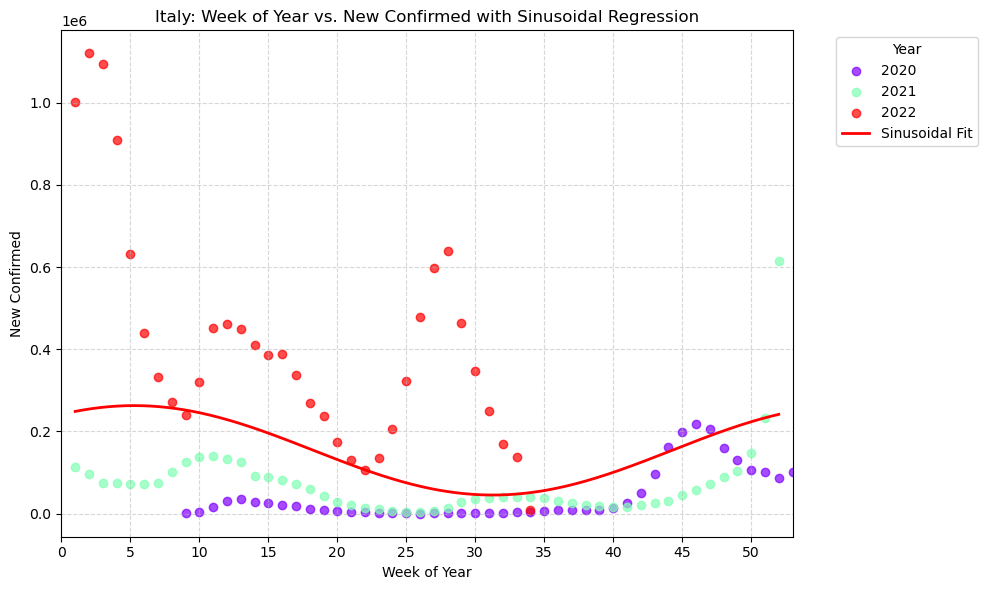

In [77]:
# Week of Year vs. Cumulative Cases
# Define the sinusoidal function with a fixed frequency (b = 2π / 52)
def sinusoidal_fixed_period(x, a, c, d):
    b = 2 * np.pi / 52  # Fixed frequency for 52 weeks
    return a * np.sin(b * x + c) + d

# Filter the data for Italy
italy_data = df[df['country_name'] == 'Italy']

# Drop rows with NaN or infinite values
italy_data = italy_data.dropna(subset=['week_start', 'new_confirmed'])
italy_data = italy_data[np.isfinite(italy_data['new_confirmed'])]

# Add the week_of_year and year columns
italy_data['week_of_year'] = italy_data['week_start'].dt.isocalendar().week
italy_data['year'] = italy_data['week_start'].dt.year

# Prepare x (week_of_year) and y (new_confirmed) data for regression
x_data = italy_data['week_of_year']
y_data = italy_data['new_confirmed']

# Adjust initial guesses based on the data
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]  # a (amplitude), c (phase shift), d (vertical shift)

# Fit the sinusoidal function with the fixed period
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)

# Generate fitted y values for the regression curve
x_fit = np.linspace(1, 52, 500)  # Smooth x values for the curve
y_fit = sinusoidal_fixed_period(x_fit, *params)

# Print the fitted parameters
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")

# Get unique years and assign a color for each year
unique_years = sorted(italy_data['year'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(unique_years)))

# Plot
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = italy_data[italy_data['year'] == year]
    plt.scatter(
        year_data['week_of_year'], 
        year_data['new_confirmed'], 
        color=colors[i], 
        label=str(year), 
        alpha=0.7
    )

# Plot the sinusoidal regression curve
plt.plot(x_fit, y_fit, color='red', label='Sinusoidal Fit', linewidth=2)

# Add titles and labels
plt.title('Italy: Week of Year vs. New Confirmed with Sinusoidal Regression')
plt.xlabel('Week of Year')
plt.ylabel('New Confirmed')

# Customize the x-axis
plt.xlim(0, 53)  # Week of year ranges from 1 to 52
plt.xticks(range(0, 54, 5))  # Show ticks every 5 weeks

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Notes and Analysis - Too Low? Too High? 
- Note how relatively low the reported cases are in 2020, and how abnormally high the reported cases are in 2022. We can search for an explanation for these discrepancies, reasoning out "maybe they did a better job at maintaining an initial outbreak, and then let go control and allowed COVID to ravage its people" or "maybe we should treat this data with a grain of salt like we did with that of Spain." 
    - Unfortunately, these explanations don't help us achieve our goal of forecasting deaths, because the cases are the only relevant data we have to work with in Italy, so we must make the most of it. 
- Then we ask ourselves a question we've asked many times before: Do we remove the outlier data? 
    - If we decide to eliminate data from 2020, we risk overestimating our cases and then, deaths. If we decide to eliminate data from 2022, then we risk underestimating our cases and deaths. 
    - With that in mind, we make the argument that by keeping both years, we find a happy medium, as the highs cancel out the lows and vice-versa. 
- Another observation here lies in the spike in cases in mid-2022. As we saw in Spain, this information may ring some alarms about the seasonality of COVID, but as all other years report the same relative maxes and mins per week-of-year, we interpret this 2022 hump as an outlier value, and move on with our sinusoidal regression.

Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):
a (amplitude): -106059.44214352909
c (phase shift): -1.2018715715829154
d (vertical shift): 154440.91711557988


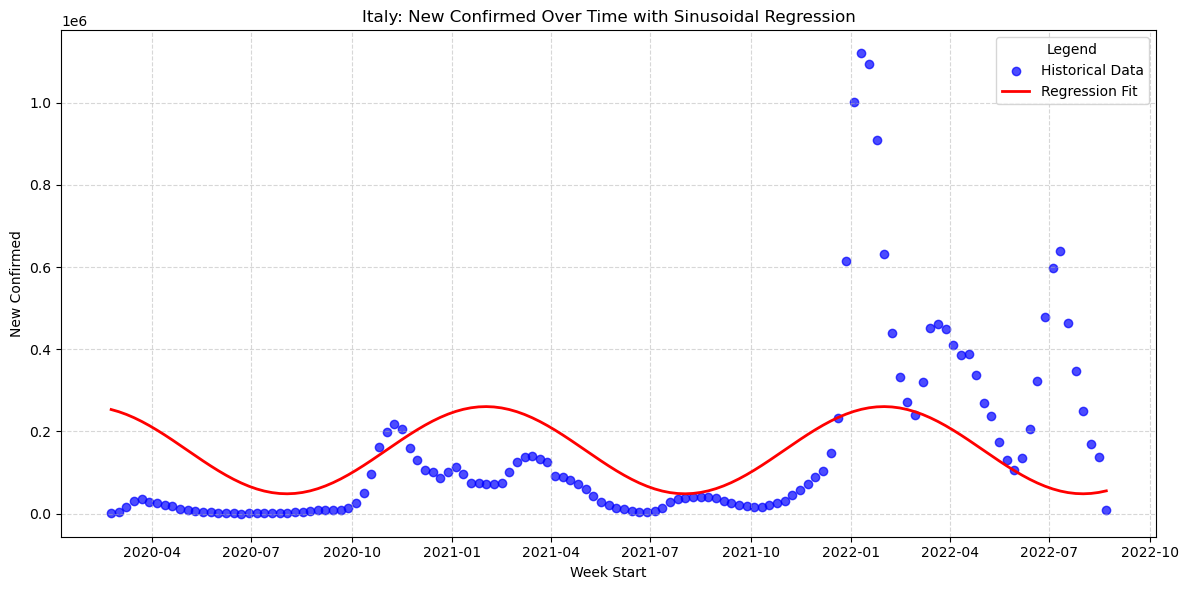

Predictions for the next 52 weeks:
   week_start  predicted_new_confirmed
0  2022-08-29             60848.972215
1  2022-09-05             67545.108197
2  2022-09-12             75508.380745
3  2022-09-19             84622.667414
4  2022-09-26             94755.061381
5  2022-10-03            105757.809525
6  2022-10-10            117470.467003
7  2022-10-17            129722.236893
8  2022-10-24            142334.460803
9  2022-10-31            155123.224107
10 2022-11-07            167902.037839
11 2022-11-14            180484.558119
12 2022-11-21            192687.303468
13 2022-11-28            204332.330380
14 2022-12-05            215249.828142
15 2022-12-12            225280.595051
16 2022-12-19            234278.359938
17 2022-12-26            242111.915131
18 2023-01-02            248667.029755
19 2023-01-09            253848.115478
20 2023-01-16            257579.620403
21 2023-01-23            259807.130787
22 2023-01-30            260498.164510
23 2023-02-06            2596

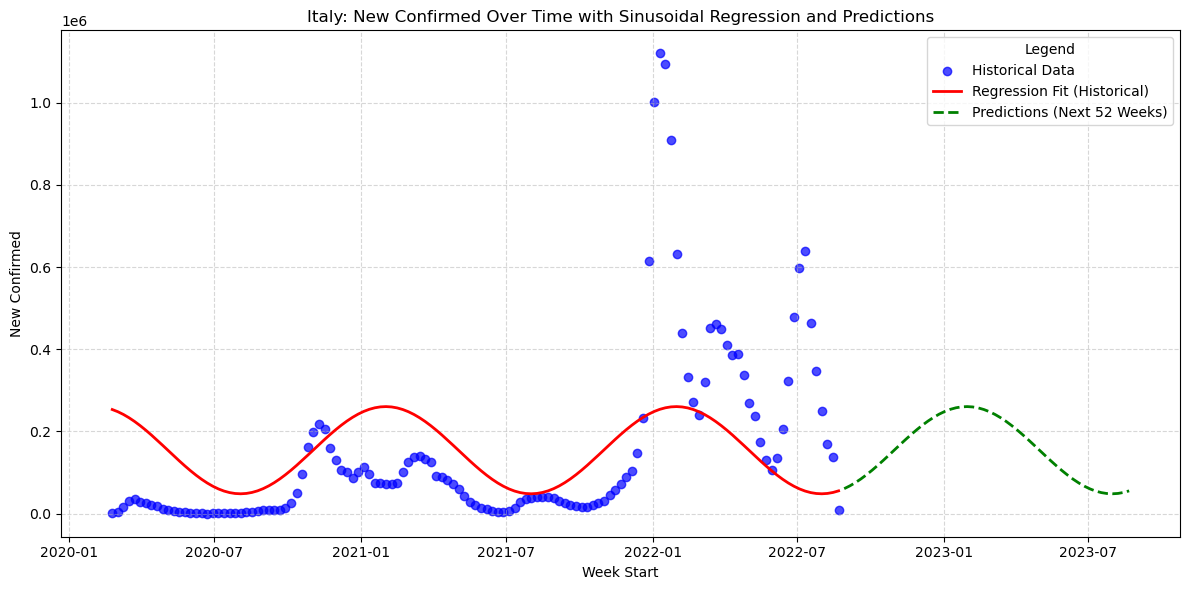

In [78]:
# Continuous Confirmed Cases with Regression line and Forecasts. 
italy_data = italy_data.sort_values('week_start')
italy_data['week_continuous'] = np.arange(len(italy_data))
x_data = italy_data['week_continuous']
y_data = italy_data['new_confirmed']
p0 = [y_data.max() - y_data.min(), 0, y_data.mean()]
params, _ = curve_fit(sinusoidal_fixed_period, x_data, y_data, p0=p0, maxfev=10000)
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = sinusoidal_fixed_period(x_fit, *params)
a, c, d = params
print(f"Fitted parameters for the sinusoidal regression (fixed period of 52 weeks):")
print(f"a (amplitude): {a}")
print(f"c (phase shift): {c}")
print(f"d (vertical shift): {d}")
plt.figure(figsize=(12, 6))
plt.scatter(italy_data['week_start'], italy_data['new_confirmed'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(italy_data['week_start'], sinusoidal_fixed_period(x_data, *params), color='red', label='Regression Fit', linewidth=2)
plt.title('Italy: New Confirmed Over Time with Sinusoidal Regression')
plt.xlabel('Week Start')
plt.ylabel('New Confirmed')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Predict for the next 52 weeks
next_52_weeks = np.arange(x_data.max() + 1, x_data.max() + 53)
next_52_predictions = sinusoidal_fixed_period(next_52_weeks, *params)
last_date = italy_data['week_start'].max()
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, 53)]
predictions_df = pd.DataFrame({
    'week_start': future_dates,
    'predicted_new_confirmed': next_52_predictions
})
print("Predictions for the next 52 weeks:")
print(predictions_df)
plt.figure(figsize=(12, 6))
plt.scatter(italy_data['week_start'], italy_data['new_confirmed'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(italy_data['week_start'], sinusoidal_fixed_period(x_data, *params), color='red', label='Regression Fit (Historical)', linewidth=2)
plt.plot(future_dates, next_52_predictions, color='green', linestyle='--', label='Predictions (Next 52 Weeks)', linewidth=2)
plt.title('Italy: New Confirmed Over Time with Sinusoidal Regression and Predictions')
plt.xlabel('Week Start')
plt.ylabel('New Confirmed')
plt.legend(title='Legend', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Notes and Analysis - Predicting Cases
- The only difference between this regression and those encountered before is the variable we're forecasting. While, prior, we were handling deaths exclusively, now we are predicting cases. 
- We already discussed the issues that may arise between the abnormal highs reported in 2022 and abnormal lows in 2020, and why we keep them in our analysis. Here we only add the point that our hypothesis was a success: Our sinusoidal regression meets the extreme lows seen in 2020 and highs seen in 2022 somewhere in the middle. 

# Where Do We Get Our Percentage Deaths/Cases From? 
- To do this, we first need to choose the countries we want to use to determine this percentage. For that, we want to pick the countries that are most consistent with one another (highest correlation)

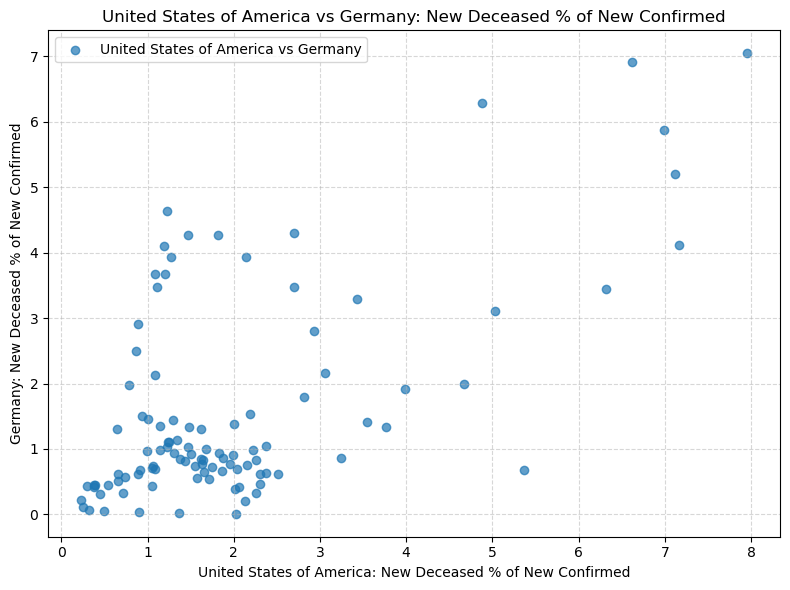

Correlation coefficient between United States of America and Germany: 0.626


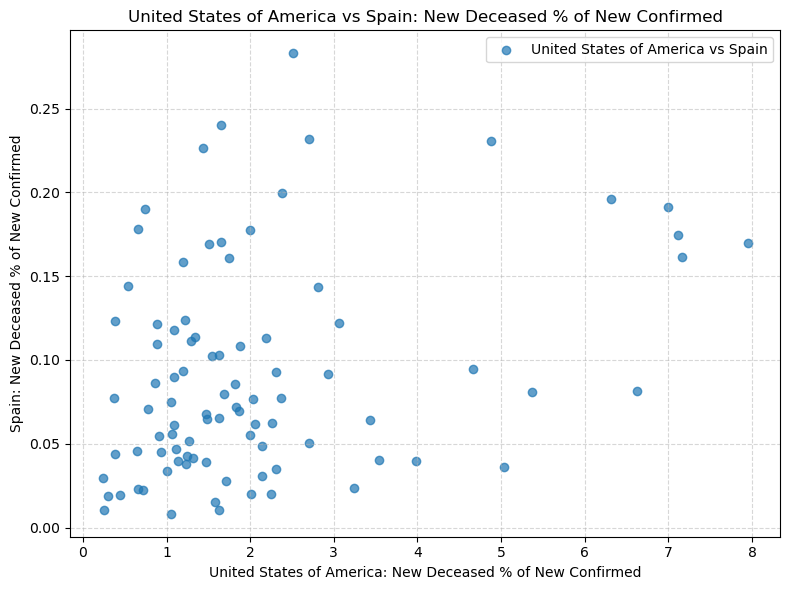

Correlation coefficient between United States of America and Spain: 0.322


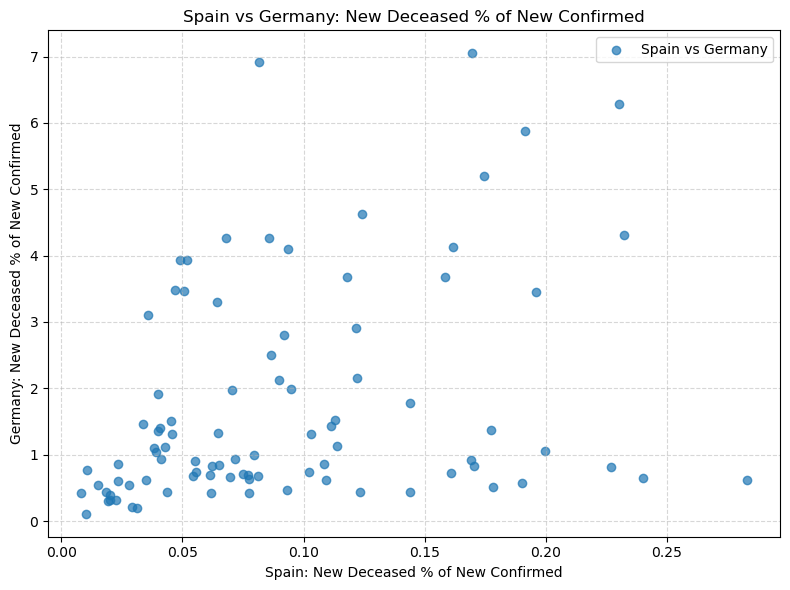

Correlation coefficient between Spain and Germany: 0.325


In [79]:
# Scatter Plots Showing Relationships between Countries' New Deaths % of New Cases values. 
def plot_and_correlate(df, country1, country2):
    # Filter data for the two countries
    country1_data = df[df['country_name'] == country1]
    country2_data = df[df['country_name'] == country2]

    # Remove rows with 0 or NaN in new_deceased_over_new_confirmed
    country1_data = country1_data.dropna(subset=['new_deceased_over_new_confirmed'])
    country2_data = country2_data.dropna(subset=['new_deceased_over_new_confirmed'])
    country1_data = country1_data[country1_data['new_deceased_over_new_confirmed'] > 0]
    country2_data = country2_data[country2_data['new_deceased_over_new_confirmed'] > 0]

    # Find common week_start values
    common_weeks = set(country1_data['week_start']).intersection(set(country2_data['week_start']))
    country1_data = country1_data[country1_data['week_start'].isin(common_weeks)]
    country2_data = country2_data[country2_data['week_start'].isin(common_weeks)]

    # Merge data on week_start
    merged_data = pd.merge(country1_data[['week_start', 'new_deceased_over_new_confirmed']],
                           country2_data[['week_start', 'new_deceased_over_new_confirmed']],
                           on='week_start',
                           suffixes=(f'_{country1}', f'_{country2}'))

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_data[f'new_deceased_over_new_confirmed_{country1}'], 
                merged_data[f'new_deceased_over_new_confirmed_{country2}'], 
                alpha=0.7, label=f'{country1} vs {country2}')
    plt.title(f'{country1} vs {country2}: New Deceased % of New Confirmed')
    plt.xlabel(f'{country1}: New Deceased % of New Confirmed')
    plt.ylabel(f'{country2}: New Deceased % of New Confirmed')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Correlation coefficient
    corr_coeff = np.corrcoef(merged_data[f'new_deceased_over_new_confirmed_{country1}'], 
                             merged_data[f'new_deceased_over_new_confirmed_{country2}'])[0, 1]
    print(f'Correlation coefficient between {country1} and {country2}: {corr_coeff:.3f}')
    return corr_coeff

# United States of America vs Germany
corr_usa_germany = plot_and_correlate(df, 'United States of America', 'Germany')

# United States of America vs Spain
corr_usa_spain = plot_and_correlate(df, 'United States of America', 'Spain')

# Spain vs Germany
corr_spain_germany = plot_and_correlate(df, 'Spain', 'Germany')

# Notes and Analysis - Pick Your Poison
- USA vs. Germany have the highest correlation coefficient (even though 0.626 isn't the most attractive correlation), so we will use their percentages as an accurate estimator for Italy. 
    - This comes as no surprise, as we had doubted the data from Spain from the beginning. 
- Now that we picked a set of countries that have data we trust, we intend to take the average of all the new deceased over new confirmed cases %s for both countries. We intend to use this information to then multiply by the predictions we made for Italian cases, and through that, report our predicted deaths for the country. 

In [80]:
# Average new_deceased_over_new_confirmed for USA and Germany data only
filtered_data = df[df['country_name'].isin(['Germany', 'United States of America'])]
filtered_data = filtered_data.dropna(subset=['new_deceased_over_new_confirmed'])
filtered_data = filtered_data[filtered_data['new_deceased_over_new_confirmed'] > 0]
average_value = filtered_data['new_deceased_over_new_confirmed'].mean()
print(f'Average new_deceased_over_new_confirmed for Germany and the USA: {average_value:.3f}')


Average new_deceased_over_new_confirmed for Germany and the USA: 1.834


Death Forecasts Table:
   week_start  death_forecast
0  2022-08-29     1116.206846
1  2022-09-05     1239.040027
2  2022-09-12     1385.117422
3  2022-09-19     1552.308893
4  2022-09-26     1738.176412
5  2022-10-03     1940.009613
6  2022-10-10     2154.865312
7  2022-10-17     2379.610429
8  2022-10-24     2610.967676
9  2022-10-31     2845.563342
10 2022-11-07     3079.976494
11 2022-11-14     3310.788860
12 2022-11-21     3534.634677
13 2022-11-28     3748.249769
14 2022-12-05     3948.519146
15 2022-12-12     4132.522429
16 2022-12-19     4297.576438
17 2022-12-26     4441.274312
18 2023-01-02     4561.520612
19 2023-01-09     4656.561878
20 2023-01-16     4725.012194
21 2023-01-23     4765.873399
22 2023-01-30     4778.549646
23 2023-02-06     4762.856085
24 2023-02-13     4719.021565
25 2023-02-20     4647.685292
26 2023-02-27     4549.887509
27 2023-03-06     4427.054328
28 2023-03-13     4280.976933
29 2023-03-20     4113.785462
30 2023-03-27     3927.917943
31 2023-04-03    

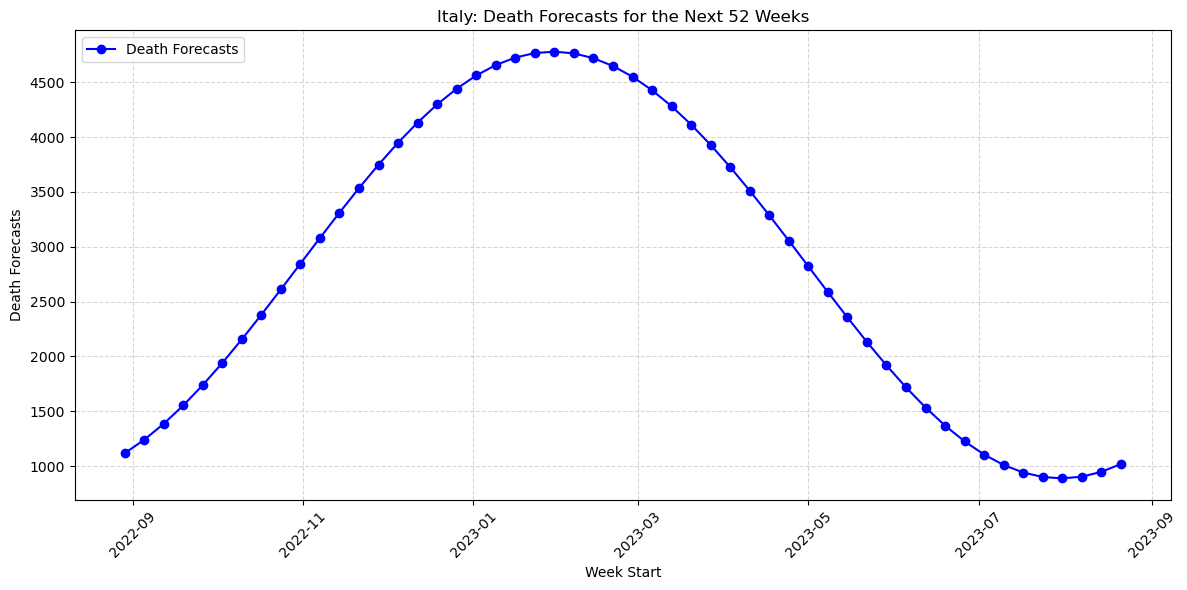

In [81]:
# Italy Death Forecasts
next_52_weeks = np.arange(x_data.max() + 1, x_data.max() + 53)
next_52_predictions = sinusoidal_fixed_period(next_52_weeks, *params)
last_date = italy_data['week_start'].max()
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, 53)]
predictions_df = pd.DataFrame({
    'week_start': future_dates,
    'predicted_new_confirmed': next_52_predictions
})
average_value = filtered_data['new_deceased_over_new_confirmed'].mean()
average_multiplier = average_value / 100
death_forecasts = [pred * average_multiplier for pred in next_52_predictions]
death_forecast_table = pd.DataFrame({
    'week_start': future_dates,
    'death_forecast': death_forecasts
})
print("Death Forecasts Table:")
print(death_forecast_table)
plt.figure(figsize=(12, 6))
plt.plot(death_forecast_table['week_start'], death_forecast_table['death_forecast'], 
         marker='o', linestyle='-', color='blue', label='Death Forecasts')
plt.title('Italy: Death Forecasts for the Next 52 Weeks')
plt.xlabel('Week Start')
plt.ylabel('Death Forecasts')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Notes and Analysis - We Did It, Italy: Here's Your Forecast!
- This is the most unique approach toward predicting deaths in any of our countries. However, with that being said, we see similar patterns begin to emerge, us experiencing a peak in deaths in the winter months, and a trough in the summer months. It's important to note that our sinusoidal phase shift is a little further right however: Whereas in Germany and the USA, we reported the highest deaths in the December months, and lowest in Jun-Jul, here we have our highs in February, and lows in August. 
    - This is most likely due to the large discrepancies seen in the seasonality of Italian cases in the 2022 data.
- We should also approach these forecasts with extreme caution, as the predictions are twice removed. Remember, they first depend on our predictions of the cases, and second, on the predicted avg percentage deaths of new cases. 
- Regardless, we are satisfied with our being able to draw a conclusion from this limited data, and are happy having some understanding of what's to come, as opposed to the alternative - not being prepared for anything at all!